## Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


## 2. Etudes des variables et de la cible (Analyse de forme)

- Identification de la variable cible
- Identifier les variables catégorielles encodées et non-encodées et Aperçu de leur distribution
- Identifier les variables quantitative continue et aperçu des variances.

### 2.1 La variable cible 'grav'

La variable est préservée de 2005 à 2022.
Gravité de l'accident : Les usagers accidentés sont classés en trois catégories de victimes plus les indemnes  
1 - Indemne  
2 - Tué  
3 - Blessé hospitalisé  
4 - Blessé léger  
-1 - Non renseigné 

grav
 1    1082803
 4     961920
 3     520836
 2      70629
-1        301
Name: count, dtype: int64


C:\Users\campa\AppData\Local\Temp\ipykernel_7576\912927207.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_by_grav.index, y=percentage_by_grav, palette='viridis')


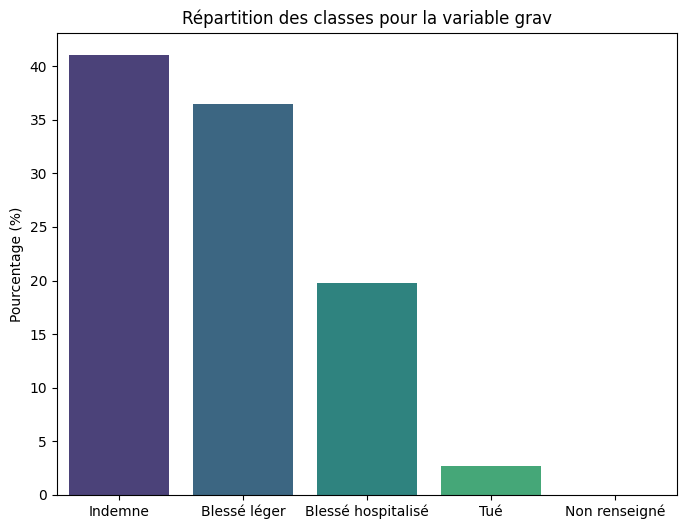

In [ ]:
# Effectuer un décompte pour chaque valeur de la variable 'grav'
count_by_grav = df['grav'].value_counts()

# Afficher le décompte pour chaque valeur
print(count_by_grav)

import seaborn as sns
import matplotlib.pyplot as plt

# Effectuer un décompte pour chaque valeur de la variable 'grav'
count_by_grav = df['grav'].value_counts()

# Calculer le pourcentage de chaque classe
percentage_by_grav = (count_by_grav / len(df)) * 100

# Mapper les valeurs de grav aux traductions correspondantes
grav_labels = {
    -1: 'Non renseigné',
    1: 'Indemne',
    2: 'Tué',
    3: 'Blessé hospitalisé',
    4: 'Blessé léger'
}

# Renommer les index avec les traductions correspondantes
percentage_by_grav.index = [grav_labels.get(x, x) for x in percentage_by_grav.index]

# Tracer un barplot avec la palette de couleurs Viridis
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_by_grav.index, y=percentage_by_grav, palette='viridis')
plt.title('Répartition des classes pour la variable grav')
plt.xlabel('')
plt.ylabel('Pourcentage (%)')
plt.show()



### 2.2 Les variables catégorielles encodées et non encodées

Lecture de la doc.

#### test 1


C:\Users\campa\AppData\Local\Temp\ipykernel_7576\425273452.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sexe, x='Sexe', y='Proportion', palette='viridis', ax=axes[0])
C:\Users\campa\AppData\Local\Temp\ipykernel_7576\425273452.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_locp, x='Localisation du piéton', y='Proportion', palette='viridis', ax=axes[1])


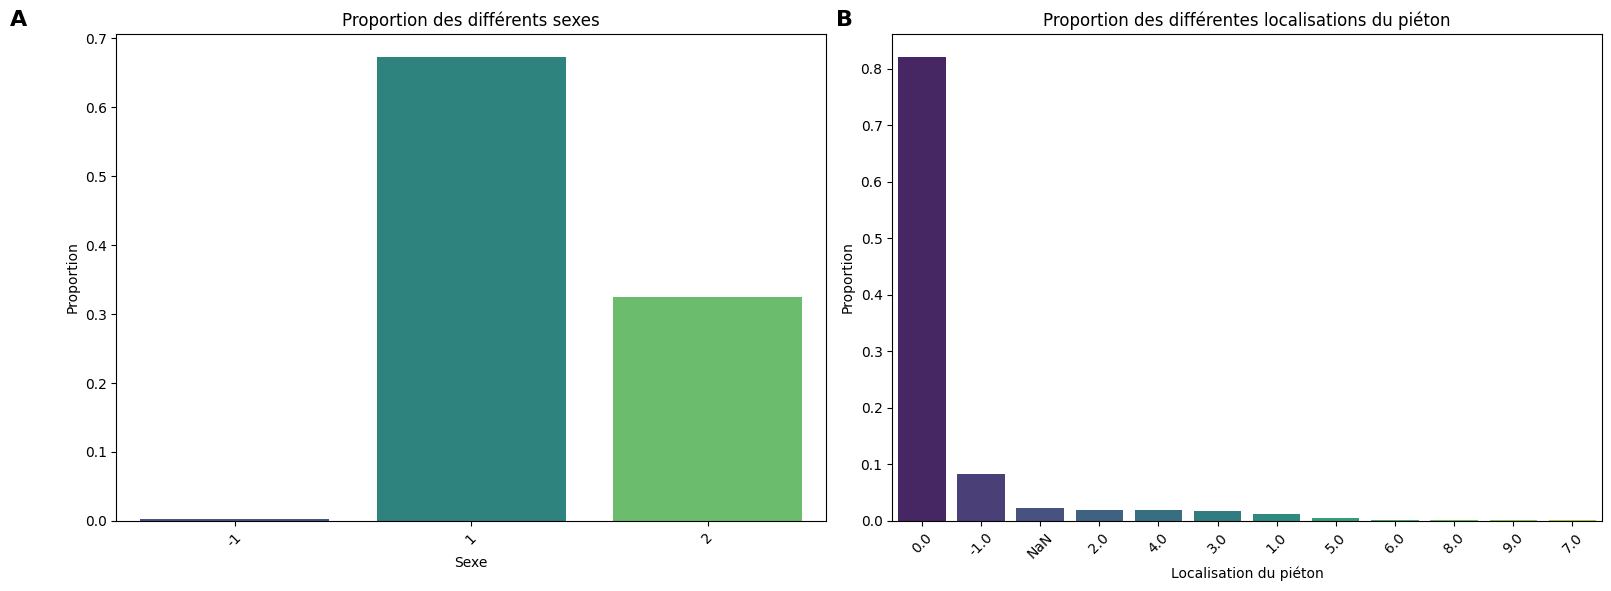

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la proportion de chaque catégorie de sexe, y compris les valeurs manquantes (NaN)
proportion_sexe = df['sexe'].value_counts(normalize=True, dropna=False)

# Créer un DataFrame à partir des proportions calculées pour sexe
df_sexe = pd.DataFrame({'Sexe': proportion_sexe.index, 'Proportion': proportion_sexe.values})

# Remplacer les valeurs NaN par "NaN"
df_sexe['Sexe'] = df_sexe['Sexe'].fillna('NaN')
# Remplacer les valeurs "Non renseigné" par "NaN"
df_sexe['Sexe'] = df_sexe['Sexe'].replace('Non renseigné', 'NaN')

# Calculer la proportion de chaque catégorie de locp, y compris les valeurs manquantes (NaN)
proportion_locp = df['locp'].value_counts(normalize=True, dropna=False)

# Créer un DataFrame à partir des proportions calculées
df_locp = pd.DataFrame({'Localisation du piéton': proportion_locp.index, 'Proportion': proportion_locp.values})

# Remplacer les valeurs NaN par "NaN"
df_locp['Localisation du piéton'] = df_locp['Localisation du piéton'].fillna('NaN')
# Remplacer "Non renseigné" par "NaN"
df_locp['Localisation du piéton'] = df_locp['Localisation du piéton'].replace('Non renseigné', 'NaN')

# Créer les graphiques seaborn
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Graphique pour la variable "sexe"
sns.barplot(data=df_sexe, x='Sexe', y='Proportion', palette='viridis', ax=axes[0])
axes[0].set_title('Proportion des différents sexes')
axes[0].set_xlabel('Sexe')
axes[0].set_ylabel('Proportion')
axes[0].tick_params(axis='x', rotation=45)  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
axes[0].text(-0.15, 1.05, 'A', transform=axes[0].transAxes, fontsize=16, fontweight='bold', va='top')

# Graphique pour la variable "locp"
sns.barplot(data=df_locp, x='Localisation du piéton', y='Proportion', palette='viridis', ax=axes[1])
axes[1].set_title('Proportion des différentes localisations du piéton')
axes[1].set_xlabel('Localisation du piéton')
axes[1].set_ylabel('Proportion')
axes[1].tick_params(axis='x', rotation=45)  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
axes[1].text(-0.08, 1.05, 'B', transform=axes[1].transAxes, fontsize=16, fontweight='bold', va='top')

plt.tight_layout()
plt.show()


In [ ]:
# Calculer le nombre de valeurs '-1' pour chaque variable
count_minus_one = df.apply(lambda x: (x == -1).sum())

# Calculer la proportion de valeurs '-1' pour chaque variable
proportion_minus_one = df.apply(lambda x: (x == -1).mean())

# Créer un DataFrame à partir des séries précédemment calculées
df_2 = pd.DataFrame({'Count of -1': count_minus_one, 'Proportion of -1': proportion_minus_one})

# Calculer la proportion de valeurs manquantes pour chaque variable
proportion_missing_values = df.isna().mean()

# Ajouter une colonne au DataFrame df_2 avec la proportion de valeurs manquantes
df_2['Proportion of Missing Values'] = proportion_missing_values

# Filtrer les variables avec une proportion de -1 supérieure à 0.05 ou une proportion de valeurs manquantes supérieure à 0.05
variables_with_high_proportion = df_2[(df_2['Proportion of -1'] > 0.05) | (df_2['Proportion of Missing Values'] > 0.05)]

# Afficher les variables filtrées
print(variables_with_high_proportion)


               Count of -1  Proportion of -1  Proportion of Missing Values
secu                     0          0.000000                      0.208934
locp                216812          0.082235                      0.000000
etatp               456370          0.173098                      0.021399
id_vehicule_x            0          0.000000                      0.812510
secu1                 5591          0.002121                      0.812510
secu2               193575          0.073422                      0.812510
secu3               488704          0.185362                      0.812510
id_usager                0          0.000000                      0.902933
occutc                   0          0.000000                      0.185134
id_vehicule_y            0          0.000000                      0.812510
motor                 1079          0.000409                      0.812510
adr                      0          0.000000                      0.131455
gps                      

#### Présentation de 4 variables 

C:\Users\campa\AppData\Local\Temp\ipykernel_16604\1379912127.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='catu', data=df, ax=axes[0, 0], palette='viridis')
C:\Users\campa\AppData\Local\Temp\ipykernel_16604\1379912127.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='catr', data=df, ax=axes[0, 1], palette='viridis')
C:\Users\campa\AppData\Local\Temp\ipykernel_16604\1379912127.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='lum', data=df, ax=axes[1, 0], palette='viridis')
C:\Users\campa\AppData\Local\Temp\ipykerne

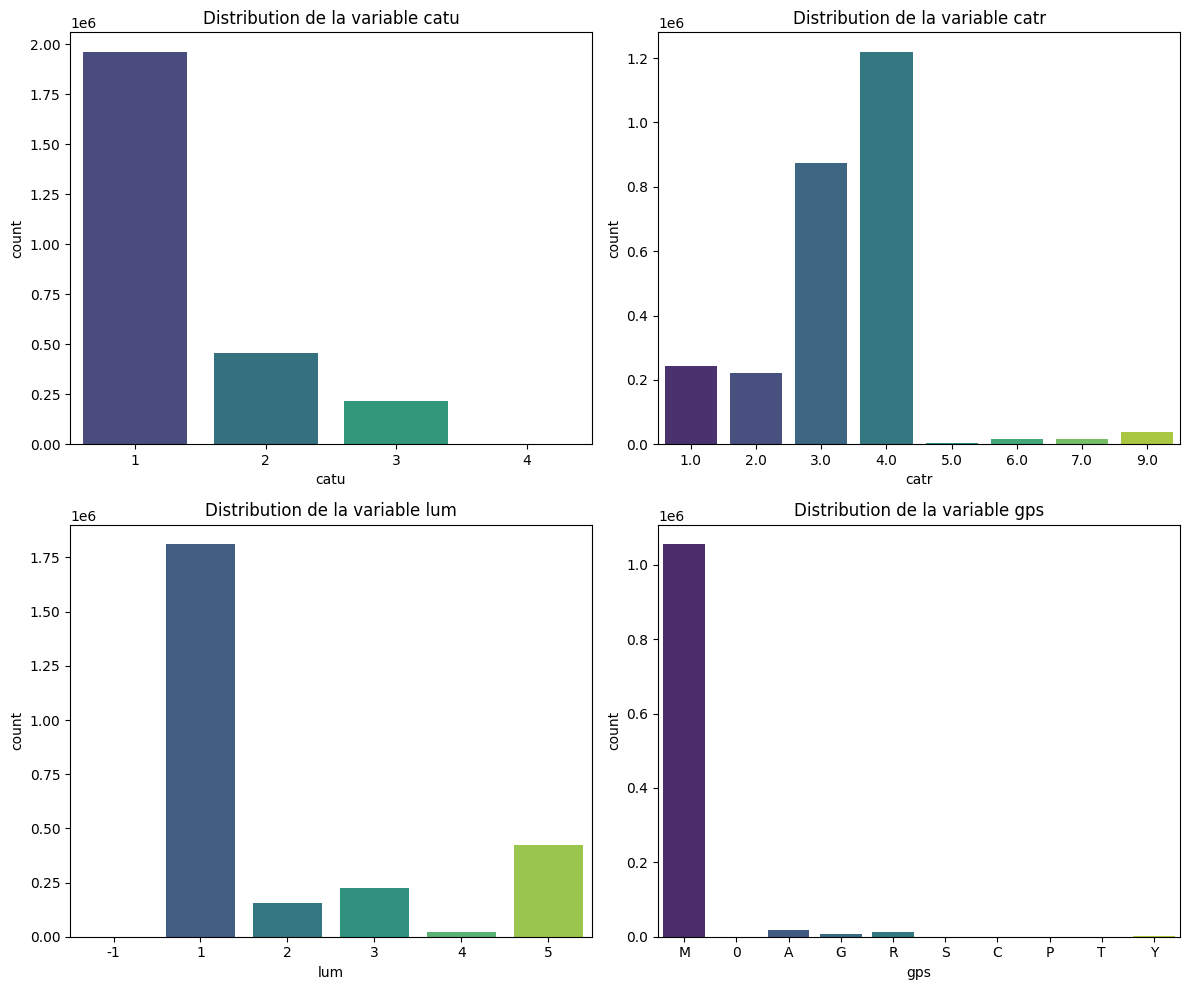

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la figure avec 4 sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution de la variable 'catu'
sns.countplot(x='catu', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Distribution de la variable catu')

# Distribution de la variable 'catr'
sns.countplot(x='catr', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribution de la variable catr')

# Distribution de la variable 'lum'
sns.countplot(x='lum', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Distribution de la variable lum')

# Distribution de la variable 'gps'
sns.countplot(x='gps', data=df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Distribution de la variable gps')

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()


#### Variable etatp

Cette variable permet de préciser si le piéton accidenté était seul ou non :  
-1 – Non renseigné  
1 – Seul  
2 – Accompagné  
3 – En groupe  


In [ ]:
locp_counts = df['etatp'].value_counts()
total_count = len(df['etatp'])
print("Valeurs uniques et leur décompte pour la variable 'etatp':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['etatp'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'etatp':", na_count)
print("Pourcentage de données manquantes pour la variable 'etatp': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'etatp':
-1: 456246 (92.32%)
1: 28863 (5.84%)
2: 7564 (1.53%)
3: 1509 (0.31%)
Nombre de valeurs manquantes pour la variable 'etatp': 0
Pourcentage de données manquantes pour la variable 'etatp': 0.00%


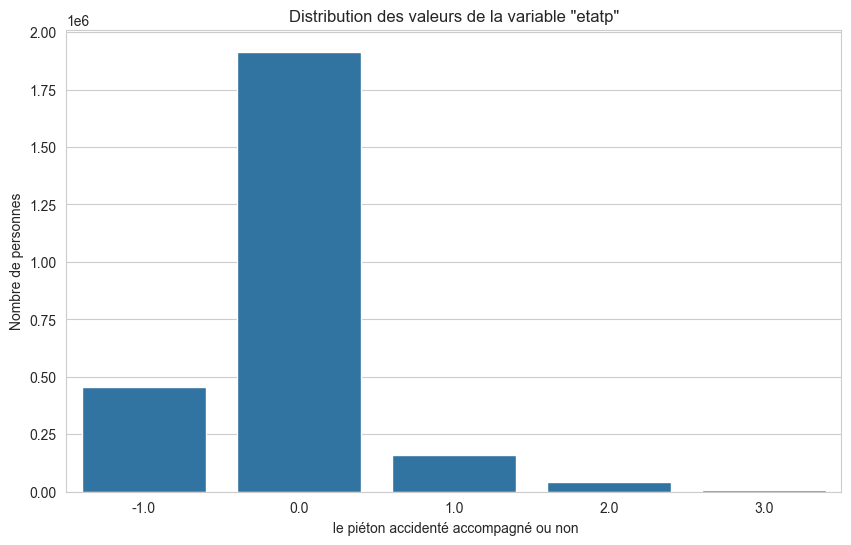

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Réglages de style optionnels
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'etatp'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='etatp')
plt.title('Distribution des valeurs de la variable "etatp"')
plt.xlabel('Piéton accidenté accompagné ou non')
plt.ylabel('Nombre de personnes')
plt.show()


La valeur '0' n'est pas docummentée, on ne connait pas sa signification. Suppression de la variable pronostiquée.

#### Variable locp

locp  
Localisation du piéton :  
-1 – Non renseigné  
0 – Sans objet  
Sur chaussée :  
1 – A + 50 m du passage piéton  
2 – A – 50 m du passage piéton  
Sur passage piéton :  
3 – Sans signalisation lumineuse  
4 – Avec signalisation lumineuse  
Divers :  
5 – Sur trottoir  
6 – Sur accotement  

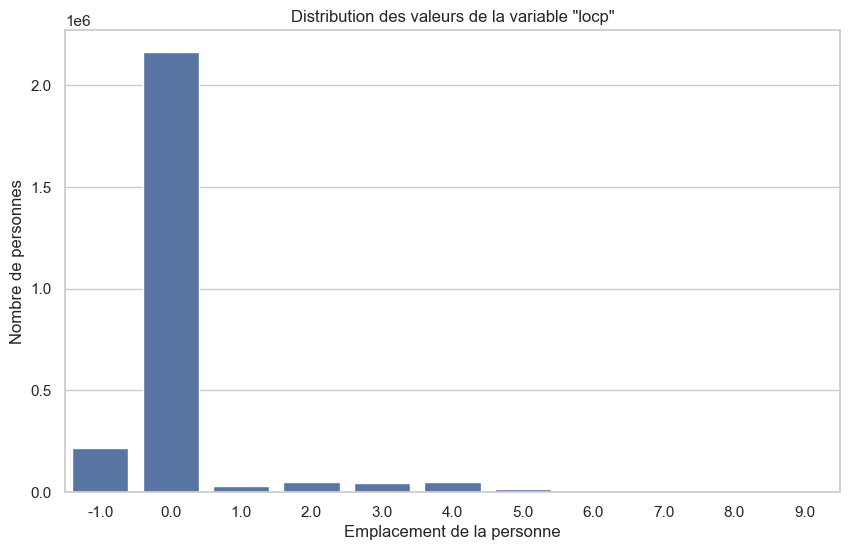

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Réglages de style optionnels
sns.set_style("whitegrid")

# Tracer le graphique de distribution des valeurs de 'locp'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='locp')
plt.title('Distribution des valeurs de la variable "locp"')
plt.xlabel('Emplacement de la personne')
plt.ylabel('Nombre de personnes')
plt.show()


In [ ]:
locp_counts = df['locp'].value_counts()
total_count = len(df['locp'])
print("Valeurs uniques et leur décompte pour la variable 'locp':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['locp'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'locp':", na_count)
print("Pourcentage de données manquantes pour la variable 'locp': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'locp':
0.0: 2162711 (82.03%)
-1.0: 216812 (8.22%)
2.0: 50467 (1.91%)
4.0: 49332 (1.87%)
3.0: 46277 (1.76%)
1.0: 31297 (1.19%)
5.0: 14071 (0.53%)
6.0: 4702 (0.18%)
8.0: 2367 (0.09%)
9.0: 1845 (0.07%)
7.0: 247 (0.01%)
Nombre de valeurs manquantes pour la variable 'locp': 56361
Pourcentage de données manquantes pour la variable 'locp': 2.14%


   Localisation du piéton  Proportion
0                     0.0    0.820300
1                    -1.0    0.082235
2                     NaN    0.021377
3                     2.0    0.019142
4                     4.0    0.018711
5                     3.0    0.017553
6                     1.0    0.011871
7                     5.0    0.005337
8                     6.0    0.001783
9                     8.0    0.000898
10                    9.0    0.000700
11                    7.0    0.000094


C:\Users\campa\AppData\Local\Temp\ipykernel_3276\3434566981.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_locp, x='Localisation du piéton', y='Proportion', palette='viridis')


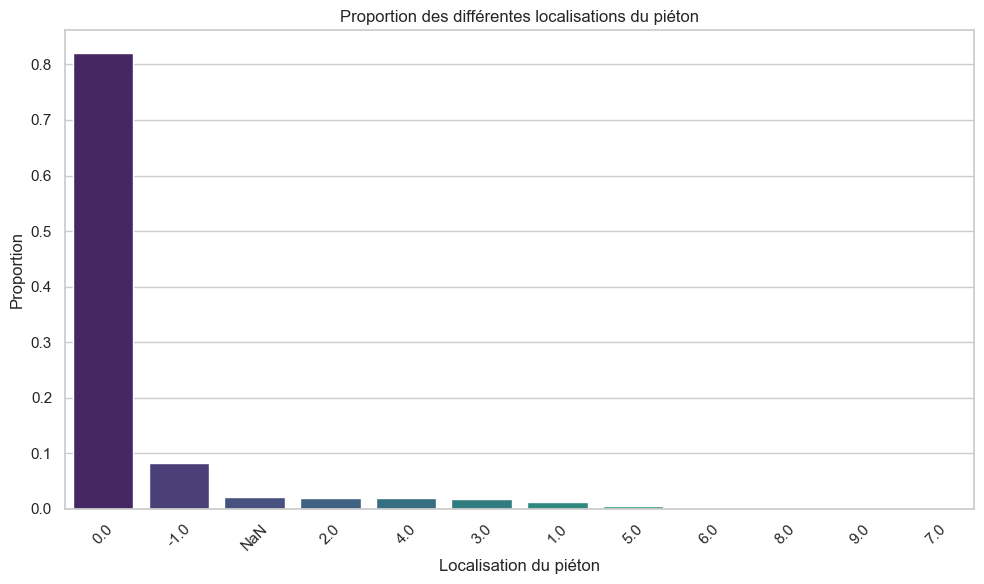

In [ ]:
import pandas as pd

# Calculer la proportion de chaque catégorie de locp, y compris les valeurs manquantes (NaN)
proportion_locp = df['locp'].value_counts(normalize=True, dropna=False)

# Créer un DataFrame à partir des proportions calculées
df_locp = pd.DataFrame({'Localisation du piéton': proportion_locp.index, 'Proportion': proportion_locp.values})

# Remplacer les valeurs NaN par "NaN"
df_locp['Localisation du piéton'] = df_locp['Localisation du piéton'].fillna('NaN')
# Remplacer "Non renseigné" par "NaN"
df_locp['Localisation du piéton'] = df_locp['Localisation du piéton'].replace('Non renseigné', 'NaN')

# Afficher le DataFrame df_locp
print(df_locp)


import seaborn as sns
import matplotlib.pyplot as plt

# Créer le graphique seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_locp, x='Localisation du piéton', y='Proportion', palette='viridis')
plt.title('Proportion des différentes localisations du piéton')
plt.xlabel('Localisation du piéton')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.tight_layout()
plt.show()


Dominante sur des valeurs non renseignées. Suppression de la variable ?

#### Variable situ

situ  
Situation de l’accident :  
-1 – Non renseigné  
0 – Aucun  
1 – Sur chaussée  
2 – Sur bande d’arrêt d’urgence  
3 – Sur accotement  
4 – Sur trottoir  
5 – Sur piste cyclable  
6 – Sur autre voie spéciale  
8 – Autres  

In [ ]:
locp_counts = df['situ'].value_counts()
total_count = len(df['situ'])
print("Valeurs uniques et leur décompte pour la variable 'situ':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['situ'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'situ':", na_count)
print("Pourcentage de données manquantes pour la variable 'situ': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'situ':
1.0: 2266477 (85.97%)
3.0: 164980 (6.26%)
0.0: 99889 (3.79%)
4.0: 36527 (1.39%)
5.0: 20320 (0.77%)
2.0: 18457 (0.70%)
8.0: 12279 (0.47%)
6.0: 5678 (0.22%)
-1.0: 275 (0.01%)
Nombre de valeurs manquantes pour la variable 'situ': 11607
Pourcentage de données manquantes pour la variable 'situ': 0.44%


Les valeurs NaN et -1 peuvent être remplacer par le mode ou le plus proche voisin (KNN).  

Que signigie 0 - Aucun ???

#### Variable infra

infra  
Aménagement - Infrastructure :  
-1 – Non renseigné  
0 – Aucun  
1 – Souterrain - tunnel  
2 – Pont - autopont  
3 – Bretelle d’échangeur ou de raccordement  
4 – Voie ferrée  
5 – Carrefour aménagé  
6 – Zone piétonne  
7 – Zone de péage  
8 – Chantier  
9 – Autres  

In [ ]:
locp_counts = df['infra'].value_counts()
print("Valeurs uniques et leur décompte pour la variable 'infra':")
print(locp_counts)

na_count = df['infra'].isna().sum()
print("Nombre de valeurs manquantes pour la variable 'infra':", na_count)


Valeurs uniques et leur décompte pour la variable 'infra':
infra
 0.0    2301030
 5.0     163098
 3.0      40376
 2.0      40159
 1.0      25266
 9.0      17317
 6.0      17047
 4.0       9275
-1.0       4462
 8.0       3788
 7.0       2071
Name: count, dtype: int64
Nombre de valeurs manquantes pour la variable 'infra': 12600


Imputation des NaN et des -1 par mode ou plus proche voisin (KNN) ?

#### Variable place

place  
Permet de situer la place occupée dans le véhicule par l'usager au moment de l'accident. Le détail est donné par l’illustration ci-dessous :  
voir la doc. 
Absence de valeur définie pour non renseignée.


In [ ]:
locp_counts = df['place'].value_counts()
total_count = len(df['place'])
print("Valeurs uniques et leur décompte pour la variable 'place':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['place'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'place':", na_count)
print("Pourcentage de données manquantes pour la variable 'place': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'place':
1.0: 1962629 (74.44%)
2.0: 281907 (10.69%)
0.0: 60761 (2.30%)
3.0: 60273 (2.29%)
4.0: 52156 (1.98%)
10.0: 38602 (1.46%)
5.0: 27702 (1.05%)
7.0: 9362 (0.36%)
9.0: 9187 (0.35%)
8.0: 8110 (0.31%)
6.0: 2647 (0.10%)
-1.0: 25 (0.00%)
Nombre de valeurs manquantes pour la variable 'place': 123128
Pourcentage de données manquantes pour la variable 'place': 4.67%


C:\Users\campa\AppData\Local\Temp\ipykernel_18620\1588420049.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='place_filled', palette='viridis')


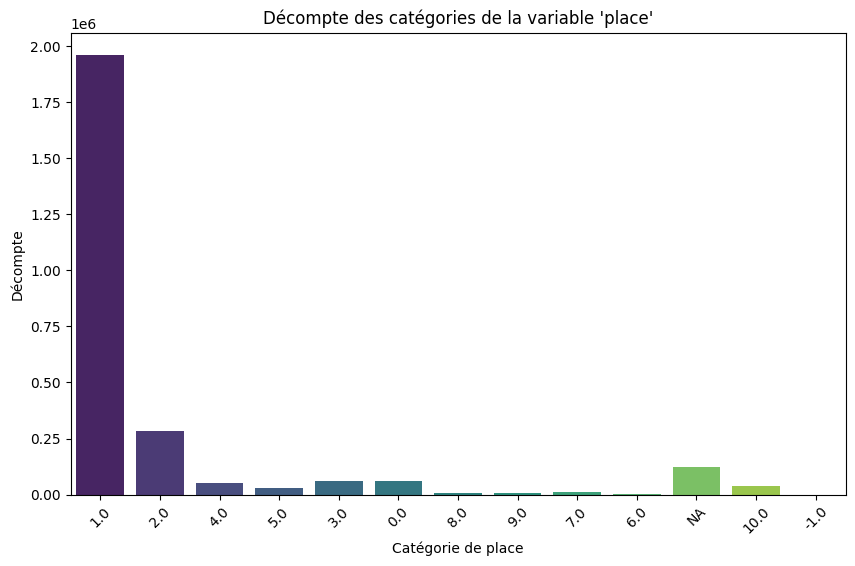

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remplacer les valeurs NaN par une catégorie distincte
df['place_filled'] = df['place'].fillna('NA')

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='place_filled', palette='viridis')
plt.title("Décompte des catégories de la variable 'place'")
plt.xlabel("Catégorie de place")
plt.ylabel("Décompte")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Remplacer les NaN et -1 par mode ou KNN

#### Variable senc

senc  
Sens de circulation :  
-1 – Non renseigné  
0 – Inconnu  
1 – PK ou PR ou numéro d’adresse postale croissant  
2 – PK ou PR ou numéro d’adresse postale décroissant  
3 – Absence de repère  

In [ ]:
locp_counts = df['senc'].value_counts()
total_count = len(df['senc'])
print("Valeurs uniques et leur décompte pour la variable 'senc':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['senc'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'senc':", na_count)
print("Pourcentage de données manquantes pour la variable 'senc': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'senc':
1: 221710 (44.86%)
2: 167564 (33.91%)
3: 71438 (14.46%)
0: 31814 (6.44%)
-1: 1656 (0.34%)
Nombre de valeurs manquantes pour la variable 'senc': 0
Pourcentage de données manquantes pour la variable 'senc': 0.00%


#### Variable trajet

trajet  
Motif du déplacement au moment de l’accident :  
-1 – Non renseigné  
0 – Non renseigné  
1 – Domicile – travail  
2 – Domicile – école  
3 – Courses – achats  
4 – Utilisation professionnelle  
5 – Promenade – loisirs  
9 – Autre  

In [ ]:
locp_counts = df['trajet'].value_counts()
total_count = len(df['trajet'])
print("Valeurs uniques et leur décompte pour la variable 'trajet':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['trajet'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'trajet':", na_count)
print("Pourcentage de données manquantes pour la variable 'trajet': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'trajet':
5.0: 978463 (37.11%)
0.0: 734743 (27.87%)
1.0: 344922 (13.08%)
4.0: 255757 (9.70%)
9.0: 189375 (7.18%)
3.0: 71044 (2.69%)
2.0: 54764 (2.08%)
-1.0: 6927 (0.26%)
Nombre de valeurs manquantes pour la variable 'trajet': 494
Pourcentage de données manquantes pour la variable 'trajet': 0.02%


#### Variable manv

Manoeuvre principale avant l’accident :  
-1 – Non renseigné  
0 – Inconnue  
1 – Sans changement de direction  
2 – Même sens, même file  
3 – Entre 2 files  
4 – En marche arrière  
5 – A contresens  
6 – En franchissant le terre-plein central  
7 – Dans le couloir bus, dans le même sens  
8 – Dans le couloir bus, dans le sens inverse  
9 – En s’insérant   
10 – En faisant demi-tour sur la chaussée  
Changeant de file  
11 – A gauche  
12 – A droite  
Déporté  
13 – A gauche  
14 – A droite  
Tournant  
15 – A gauche  
16 – A droite  
Dépassant  
17 – A gauche  
18 – A droite  
Divers  
19 – Traversant la chaussée  
20 – Manœuvre de stationnement  
21 – Manœuvre d’évitement  
22 – Ouverture de porte  
23 – Arrêté (hors stationnement)  
24 – En stationnement (avec occupants)  
25 – Circulant sur trottoir  
26 – Autres manœuvres  

In [ ]:
locp_counts = df['manv'].value_counts()
total_count = len(df['manv'])
print("Valeurs uniques et leur décompte pour la variable 'manv':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['manv'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'manv':", na_count)
print("Pourcentage de données manquantes pour la variable 'manv': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'manv':
1.0: 1383325 (52.55%)
2.0: 289161 (10.99%)
15.0: 214950 (8.17%)
13.0: 111839 (4.25%)
17.0: 85711 (3.26%)
23.0: 67763 (2.57%)
16.0: 61196 (2.32%)
9.0: 56818 (2.16%)
19.0: 53469 (2.03%)
14.0: 49074 (1.86%)
21.0: 43247 (1.64%)
4.0: 27961 (1.06%)
5.0: 25496 (0.97%)
11.0: 24991 (0.95%)
12.0: 20952 (0.80%)
10.0: 20752 (0.79%)
26.0: 17465 (0.66%)
3.0: 17423 (0.66%)
20.0: 14103 (0.54%)
18.0: 11921 (0.45%)
7.0: 10108 (0.38%)
24.0: 9181 (0.35%)
22.0: 6676 (0.25%)
6.0: 5443 (0.21%)
25.0: 1438 (0.05%)
8.0: 1426 (0.05%)
Nombre de valeurs manquantes pour la variable 'manv': 412
Pourcentage de données manquantes pour la variable 'manv': 0.02%


#### Variable lum

lum  
Lumière : conditions d’éclairage dans lesquelles l'accident s'est produit :  
1 – Plein jour  
2 – Crépuscule ou aube  
3 – Nuit sans éclairage public  
4 – Nuit avec éclairage public non allumé  
5 – Nuit avec éclairage public allumé  

In [ ]:
locp_counts = df['lum'].value_counts()
total_count = len(df['lum'])
print("Valeurs uniques et leur décompte pour la variable 'lum':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['lum'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'lum':", na_count)
print("Pourcentage de données manquantes pour la variable 'lum': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'lum':
1: 1808225 (68.67%)
5: 422021 (16.03%)
3: 224936 (8.54%)
2: 156448 (5.94%)
4: 21691 (0.82%)
-1: 9 (0.00%)
Nombre de valeurs manquantes pour la variable 'lum': 0
Pourcentage de données manquantes pour la variable 'lum': 0.00%


#### Variable catv

Catégorie du véhicule :  
00 – Indéterminable  
01 – Bicyclette  
02 – Cyclomoteur <50cm3  
03 – Voiturette (Quadricycle à moteur carrossé) (anciennement "voiturette ou tricycle à moteur")  
04 – Référence inutilisée depuis 2006 (scooter immatriculé)  
05 – Référence inutilisée depuis 2006 (motocyclette)  
06 – Référence inutilisée depuis 2006 (side-car)  
07 – VL seul  
08 – Référence inutilisée depuis 2006 (VL + caravane)  
09 – Référence inutilisée depuis 2006 (VL + remorque)  
10 – VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC<= 3,5T)  
11 – Référence inutilisée depuis 2006 (VU (10) + caravane)  
12 – Référence inutilisée depuis 2006 (VU (10) + remorque)  
13 – PL seul 3,5T <PTCA <= 7,5T  
14 – PL seul > 7,5T  
15 – PL > 3,5T + remorque  
16 – Tracteur routier seul  
17 – Tracteur routier + semi-remorque  
18 – Référence inutilisée depuis 2006 (transport en commun)  
19 – Référence inutilisée depuis 2006 (tramway)  
20 – Engin spécial  
21 – Tracteur agricole  
30 – Scooter < 50 cm3  
31 – Motocyclette > 50 cm3 et <= 125 cm3  
32 – Scooter > 50 cm3 et <= 125 cm3  
33 – Motocyclette > 125 cm3  
34 – Scooter > 125 cm3  
35 – Quad léger <= 50 cm3 (Quadricycle à moteur non carrossé)  
36 – Quad lourd > 50 cm3 (Quadricycle à moteur non carrossé)  
37 – Autobus  
38 – Autocar  
39 – Train  
40 – Tramway  
41 – 3RM <= 50 cm3  
42 – 3RM > 50 cm3 <= 125 cm3  
43 – 3RM > 125 cm3  
50 – EDP à moteur  
60 – EDP sans moteur  
80 – VAE  
99 – Autre véhicule  

In [ ]:
locp_counts = df['catv'].value_counts()
total_count = len(df['catv'])
print("Valeurs uniques et leur décompte pour la variable 'catv':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['catv'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'catv':", na_count)
print("Pourcentage de données manquantes pour la variable 'catv': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'catv':
3.0: 1866589 (70.91%)
2.0: 534766 (20.32%)
1.0: 102751 (3.90%)
4.0: 102070 (3.88%)
5.0: 26125 (0.99%)
Nombre de valeurs manquantes pour la variable 'catv': 0
Pourcentage de données manquantes pour la variable 'catv': 0.00%


#### Variable int

int  
Intersection :  
1 – Hors intersection  
2 – Intersection en X  
3 – Intersection en T  
4 – Intersection en Y  
5 – Intersection à plus de 4 branches  
6 – Giratoire  
7 – Place  
8 – Passage à niveau  
9 – Autre intersection  

In [ ]:
locp_counts = df['int'].value_counts()
total_count = len(df['int'])
print("Valeurs uniques et leur décompte pour la variable 'int':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['int'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'int':", na_count)
print("Pourcentage de données manquantes pour la variable 'int': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'int':
1: 1822787 (69.22%)
2: 339646 (12.90%)
3: 246336 (9.35%)
6: 73891 (2.81%)
9: 59719 (2.27%)
4: 41773 (1.59%)
5: 24457 (0.93%)
7: 20976 (0.80%)
8: 3470 (0.13%)
0: 254 (0.01%)
-1: 21 (0.00%)
Nombre de valeurs manquantes pour la variable 'int': 0
Pourcentage de données manquantes pour la variable 'int': 0.00%


#### Variable catr

In [ ]:
locp_counts = df['catr'].value_counts()
total_count = len(df['catr'])
print("Valeurs uniques et leur décompte pour la variable 'catr':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['catr'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'catr':", na_count)
print("Pourcentage de données manquantes pour la variable 'catr': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'catr':
4.0: 1217856 (46.27%)
3.0: 872328 (33.14%)
1.0: 243030 (9.23%)
2.0: 222123 (8.44%)
9.0: 39186 (1.49%)
7.0: 16918 (0.64%)
6.0: 16832 (0.64%)
5.0: 4028 (0.15%)
Nombre de valeurs manquantes pour la variable 'catr': 0
Pourcentage de données manquantes pour la variable 'catr': 0.00%


#### Variable catu

In [ ]:
locp_counts = df['catu'].value_counts()
total_count = len(df['catu'])
print("Valeurs uniques et leur décompte pour la variable 'catu':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['catu'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'catu':", na_count)
print("Pourcentage de données manquantes pour la variable 'catu': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'catu':
1: 367226 (74.31%)
2: 88365 (17.88%)
3: 38591 (7.81%)
Nombre de valeurs manquantes pour la variable 'catu': 0
Pourcentage de données manquantes pour la variable 'catu': 0.00%


#### Variable sexe

In [ ]:
locp_counts = df['sexe'].value_counts()
total_count = len(df['sexe'])
print("Valeurs uniques et leur décompte pour la variable 'sexe':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['sexe'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'sexe':", na_count)
print("Pourcentage de données manquantes pour la variable 'sexe': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'sexe':
1.0: 1776481 (67.49%)
2.0: 855820 (32.51%)
Nombre de valeurs manquantes pour la variable 'sexe': 0
Pourcentage de données manquantes pour la variable 'sexe': 0.00%


#### secu1

In [ ]:
locp_counts = df['secu1'].value_counts()
total_count = len(df['secu1'])
print("Valeurs uniques et leur décompte pour la variable 'secu1':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['secu1'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'secu1':", na_count)
print("Pourcentage de données manquantes pour la variable 'secu1': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'secu1':
1: 292332 (59.15%)
2: 91302 (18.48%)
8: 59115 (11.96%)
0: 41182 (8.33%)
-1: 5591 (1.13%)
3: 3158 (0.64%)
9: 535 (0.11%)
6: 399 (0.08%)
4: 334 (0.07%)
5: 219 (0.04%)
7: 15 (0.00%)
Nombre de valeurs manquantes pour la variable 'secu1': 0
Pourcentage de données manquantes pour la variable 'secu1': 0.00%


#### secu2

In [ ]:
locp_counts = df['secu2'].value_counts()
total_count = len(df['secu2'])
print("Valeurs uniques et leur décompte pour la variable 'secu2':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['secu2'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'secu2':", na_count)
print("Pourcentage de données manquantes pour la variable 'secu2': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'secu2':
-1: 193509 (39.16%)
0: 189789 (38.40%)
8: 50941 (10.31%)
6: 44898 (9.09%)
5: 5771 (1.17%)
4: 4845 (0.98%)
9: 1481 (0.30%)
1: 896 (0.18%)
2: 841 (0.17%)
7: 656 (0.13%)
3: 555 (0.11%)
Nombre de valeurs manquantes pour la variable 'secu2': 0
Pourcentage de données manquantes pour la variable 'secu2': 0.00%


#### secu3

In [ ]:
locp_counts = df['secu3'].value_counts()
total_count = len(df['secu3'])
print("Valeurs uniques et leur décompte pour la variable 'secu3':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['secu3'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'secu3':", na_count)
print("Pourcentage de données manquantes pour la variable 'secu3': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'secu3':
-1: 488588 (98.87%)
9: 3549 (0.72%)
0: 1330 (0.27%)
6: 250 (0.05%)
8: 235 (0.05%)
1: 87 (0.02%)
4: 71 (0.01%)
5: 38 (0.01%)
2: 15 (0.00%)
7: 12 (0.00%)
3: 7 (0.00%)
Nombre de valeurs manquantes pour la variable 'secu3': 0
Pourcentage de données manquantes pour la variable 'secu3': 0.00%


#### Variable actp

In [ ]:
locp_counts = df['actp'].value_counts()
total_count = len(df['actp'])
print("Valeurs uniques et leur décompte pour la variable 'actp':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['actp'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'actp':", na_count)
print("Pourcentage de données manquantes pour la variable 'actp': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'actp':
0: 270499 (54.74%)
 -1: 185666 (37.57%)
3: 27908 (5.65%)
9: 2532 (0.51%)
1: 2477 (0.50%)
5: 1532 (0.31%)
B: 1234 (0.25%)
2: 1163 (0.24%)
4: 531 (0.11%)
A: 422 (0.09%)
6: 106 (0.02%)
7: 60 (0.01%)
8: 52 (0.01%)
Nombre de valeurs manquantes pour la variable 'actp': 0
Pourcentage de données manquantes pour la variable 'actp': 0.00%


#### Variable obs

In [ ]:
locp_counts = df['obs'].value_counts()
total_count = len(df['obs'])
print("Valeurs uniques et leur décompte pour la variable 'obs':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['obs'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'obs':", na_count)
print("Pourcentage de données manquantes pour la variable 'obs': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'obs':
0.0: 2243771 (85.10%)
1.0: 57992 (2.20%)
13.0: 54330 (2.06%)
2.0: 45228 (1.72%)
3.0: 35382 (1.34%)
6.0: 34906 (1.32%)
4.0: 34870 (1.32%)
8.0: 31759 (1.20%)
14.0: 19139 (0.73%)
12.0: 16057 (0.61%)
16.0: 14846 (0.56%)
15.0: 14620 (0.55%)
9.0: 10566 (0.40%)
7.0: 6943 (0.26%)
11.0: 6324 (0.24%)
5.0: 4304 (0.16%)
10.0: 3566 (0.14%)
17.0: 630 (0.02%)
-1.0: 195 (0.01%)
Nombre de valeurs manquantes pour la variable 'obs': 1061
Pourcentage de données manquantes pour la variable 'obs': 0.04%


#### Variable obsm

Obstacle mobile heurté :  
-1 – Non renseigné  
0 – Aucun  
1 – Piéton  
2 – Véhicule  
4 – Véhicule sur rail  
5 – Animal domestique  
6 – Animal sauvage  
9 – Autre  

In [ ]:
locp_counts = df['obsm'].value_counts()
total_count = len(df['obsm'])
print("Valeurs uniques et leur décompte pour la variable 'obsm':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['obsm'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'obsm':", na_count)
print("Pourcentage de données manquantes pour la variable 'obsm': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'obsm':
2.0: 2183273 (82.82%)
1.0: 410496 (15.57%)
4.0: 42419 (1.61%)
Nombre de valeurs manquantes pour la variable 'obsm': 0
Pourcentage de données manquantes pour la variable 'obsm': 0.00%


#### Variable gps

In [ ]:
locp_counts = df['gps'].value_counts()
total_count = len(df['gps'])
print("Valeurs uniques et leur décompte pour la variable 'gps':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['gps'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'gps':", na_count)
print("Pourcentage de données manquantes pour la variable 'gps': {:.2f}%".format(percentage_missing))


KeyError: 'gps'

#### Variable nbv

In [ ]:
locp_counts = df['nbv'].value_counts()
total_count = len(df['nbv'])
print("Valeurs uniques et leur décompte pour la variable 'nbv':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['nbv'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'nbv':", na_count)
print("Pourcentage de données manquantes pour la variable 'nbv': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'nbv':
2.0: 1477625 (56.05%)
1.0: 283555 (10.76%)
4.0: 269945 (10.24%)
0.0: 248587 (9.43%)
3.0: 220800 (8.37%)
6.0: 55369 (2.10%)
5.0: 31673 (1.20%)
8.0: 11830 (0.45%)
2: 9843 (0.37%)
-1.0: 4638 (0.18%)
7.0: 4136 (0.16%)
10.0: 2398 (0.09%)
4: 2152 (0.08%)
1: 1471 (0.06%)
3: 1437 (0.05%)
9.0: 1309 (0.05%)
20.0: 514 (0.02%)
6: 503 (0.02%)
11.0: 365 (0.01%)
12.0: 347 (0.01%)
50.0: 338 (0.01%)
5: 316 (0.01%)
0: 305 (0.01%)
 -1: 152 (0.01%)
8: 146 (0.01%)
30.0: 75 (0.00%)
40.0: 66 (0.00%)
13.0: 47 (0.00%)
25.0: 42 (0.00%)
10: 32 (0.00%)
14.0: 23 (0.00%)
21.0: 22 (0.00%)
26.0: 21 (0.00%)
7: 19 (0.00%)
15.0: 15 (0.00%)
24.0: 14 (0.00%)
90.0: 13 (0.00%)
70.0: 12 (0.00%)
22.0: 11 (0.00%)
31.0: 8 (0.00%)
60.0: 7 (0.00%)
9: 5 (0.00%)
45.0: 4 (0.00%)
17.0: 4 (0.00%)
16.0: 4 (0.00%)
33.0: 3 (0.00%)
36.0: 3 (0.00%)
91.0: 3 (0.00%)
27.0: 3 (0.00%)
86.0: 3 (0.00%)
53.0: 3 (0.00%)
28.0: 2 (0.00%)
52.0: 2 (0.00%)
62.0: 2 (0.00%)
39.0: 2 (0.00%)
84.0: 2 (

#### Variable vosp

In [ ]:
locp_counts = df['vosp'].value_counts()
total_count = len(df['vosp'])
print("Valeurs uniques et leur décompte pour la variable 'vosp':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['vosp'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'vosp':", na_count)
print("Pourcentage de données manquantes pour la variable 'vosp': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'vosp':
0.0: 2445798 (92.77%)
3.0: 78523 (2.98%)
1.0: 63610 (2.41%)
2.0: 39352 (1.49%)
-1.0: 2853 (0.11%)
Nombre de valeurs manquantes pour la variable 'vosp': 6353
Pourcentage de données manquantes pour la variable 'vosp': 0.24%


### 2.3 Distribution / Variances des variables quantitatives continues

#### Visualisation de larrout et lartpc

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la variance de 'larrout'
var_larrout = df['larrout'].var()

# Convertir les valeurs de 'lartpc' en float en remplaçant les virgules par des points
df['lartpc'] = df['lartpc'].str.replace(',', '.').astype(float)

# Calcul de la variance de 'lartpc'
var_lartpc = df['lartpc'].var()

# Affichage des variances
print("Variance de larrout:", var_larrout)
print("Variance de lartpc:", var_lartpc)


Variance de larrout: 14.424482143862289
Variance de lartpc: 20.94996874715952


In [ ]:
df['larrout'].dtypes

dtype('float64')

In [ ]:
df['lartpc'].dtypes

dtype('float64')

In [ ]:
locp_counts = df['lartpc'].value_counts()
total_count = len(df['lartpc'])
print("Valeurs uniques et leur décompte pour la variable 'lartpc':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['lartpc'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'lartpc':", na_count)
print("Pourcentage de données manquantes pour la variable 'lartpc': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'lartpc':
0.0: 370 (0.01%)
2.5: 33 (0.00%)
3.0: 25 (0.00%)
2.0: 18 (0.00%)
4.0: 17 (0.00%)
3.5: 12 (0.00%)
5.0: 9 (0.00%)
6.0: 7 (0.00%)
4.5: 6 (0.00%)
6.5: 5 (0.00%)
5.7: 5 (0.00%)
1.5: 5 (0.00%)
3.1: 4 (0.00%)
10.2: 4 (0.00%)
10.0: 4 (0.00%)
8.0: 4 (0.00%)
2.8: 4 (0.00%)
7.0: 3 (0.00%)
3.2: 3 (0.00%)
2.7: 3 (0.00%)
8.2: 3 (0.00%)
42.0: 3 (0.00%)
6.1: 2 (0.00%)
0.4: 2 (0.00%)
5.5: 2 (0.00%)
7.5: 2 (0.00%)
5.25: 2 (0.00%)
15.0: 2 (0.00%)
13.0: 2 (0.00%)
10.5: 2 (0.00%)
40.0: 2 (0.00%)
6.3: 2 (0.00%)
8.8: 2 (0.00%)
12.5: 1 (0.00%)
6.8: 1 (0.00%)
3.7: 1 (0.00%)
1.6: 1 (0.00%)
20.0: 1 (0.00%)
0.8: 1 (0.00%)
Nombre de valeurs manquantes pour la variable 'lartpc': 2635914
Pourcentage de données manquantes pour la variable 'lartpc': 99.98%


#### Variable larrout

## 3. Visualisation des données (Analyse de fond)

- Visualisation de la variable cible
- Visualisation des relations variables avec la cible

### 3.1 Visualisation de la variable cible

La variable est préservée de 2005 à 2022.
Gravité de l'accident : Les usagers accidentés sont classés en trois catégories de victimes plus les indemnes  
1 - Indemne  
2 - Tué  
3 - Blessé hospitalisé  
4 - Blessé léger 

#### 3.1.1 Décompte des valeurs grav et pourcentage

In [ ]:
import pandas as pd
# Comptage des valeurs de la colonne 'grav'
count_values = df['grav'].value_counts(dropna=False)

# Nombre de valeurs manquantes
na_count = df['grav'].isna().sum()

# Calcul du pourcentage de chaque valeur de 'grav'
percentage_values = (count_values / len(df)) * 100

# Affichage des résultats
print("Décompte des valeurs de 'grav':")
print(count_values)
print("\nPourcentage de chaque valeur de 'grav':")
print(percentage_values)
print("\nNombre de valeurs manquantes (NA):", na_count)


Décompte des valeurs de 'grav':
grav
 1    1081303
 4     960980
 3     520447
 2      70600
-1        301
Name: count, dtype: int64

Pourcentage de chaque valeur de 'grav':
grav
 1    41.057498
 4    36.488787
 3    19.761576
 2     2.680710
-1     0.011429
Name: count, dtype: float64

Nombre de valeurs manquantes (NA): 0


#### 3.1.2 Représentation de grav

grav
 1    1082803
 4     961920
 3     520836
 2      70629
-1        301
Name: count, dtype: int64


C:\Users\campa\AppData\Local\Temp\ipykernel_3276\912927207.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_by_grav.index, y=percentage_by_grav, palette='viridis')


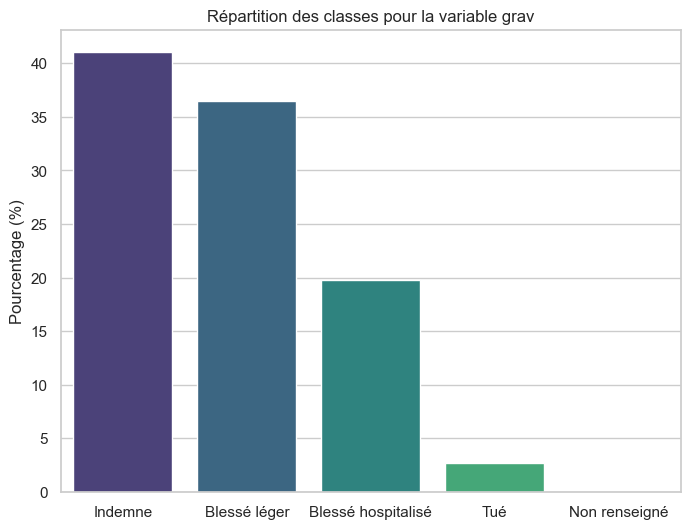

In [ ]:
# Effectuer un décompte pour chaque valeur de la variable 'grav'
count_by_grav = df['grav'].value_counts()

# Afficher le décompte pour chaque valeur
print(count_by_grav)

import seaborn as sns
import matplotlib.pyplot as plt

# Effectuer un décompte pour chaque valeur de la variable 'grav'
count_by_grav = df['grav'].value_counts()

# Calculer le pourcentage de chaque classe
percentage_by_grav = (count_by_grav / len(df)) * 100

# Mapper les valeurs de grav aux traductions correspondantes
grav_labels = {
    -1: 'Non renseigné',
    1: 'Indemne',
    2: 'Tué',
    3: 'Blessé hospitalisé',
    4: 'Blessé léger'
}

# Renommer les index avec les traductions correspondantes
percentage_by_grav.index = [grav_labels.get(x, x) for x in percentage_by_grav.index]

# Tracer un barplot avec la palette de couleurs Viridis
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_by_grav.index, y=percentage_by_grav, palette='viridis')
plt.title('Répartition des classes pour la variable grav')
plt.xlabel('')
plt.ylabel('Pourcentage (%)')
plt.show()



### 3.2 Visualisation des relations variables avec la cible

#### 3.2.1 Gravité en fonction des catégories d'usagers

- Nombre d'accident par gravité et selon la catégorie d'usager
- Proportion de la gravité de l'accident en fonction du type d'usager et test statistiques.
- Tableau de contingence

##### a- Nombre d'accidents par gravité et selon la catégorie d'usager

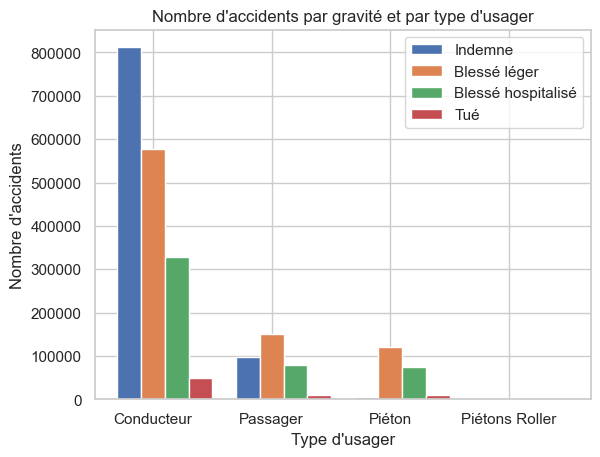

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que votre dataframe s'appelle df

# Compter le nombre d'accidents par gravité et par type d'usager
accidents_par_grav_catu = df.groupby(['grav', 'catu']).agg({'Num_Acc': 'nunique'}).reset_index()

# Filtrer les données pour chaque gravité
accidents_grav_1 = accidents_par_grav_catu[accidents_par_grav_catu['grav'] == 1]
accidents_grav_2 = accidents_par_grav_catu[accidents_par_grav_catu['grav'] == 2]
accidents_grav_3 = accidents_par_grav_catu[accidents_par_grav_catu['grav'] == 3]
accidents_grav_4 = accidents_par_grav_catu[accidents_par_grav_catu['grav'] == 4]

# Plot
fig, ax = plt.subplots()

# Largeur des barres
bar_width = 0.2

# Positions des barres
index = accidents_grav_1['catu']

# Plot des barres pour chaque gravité dans l'ordre demandé
ax.bar(index - bar_width, accidents_grav_1['Num_Acc'], bar_width, label='Indemne')
ax.bar(index, accidents_grav_4['Num_Acc'], bar_width, label='Blessé léger')
ax.bar(index + bar_width, accidents_grav_3['Num_Acc'], bar_width, label='Blessé hospitalisé')
ax.bar(index + 2*bar_width, accidents_grav_2['Num_Acc'], bar_width, label='Tué')

ax.set_xlabel('Type d\'usager')
ax.set_ylabel('Nombre d\'accidents')
ax.set_title('Nombre d\'accidents par gravité et par type d\'usager')
ax.set_xticks(index)
ax.set_xticklabels(['Conducteur', 'Passager', 'Piéton', 'Piétons Roller'])
ax.legend()

plt.show()


##### b- Proportion de la gravité de l'accident en fonction du type d'usager et test statistiques.

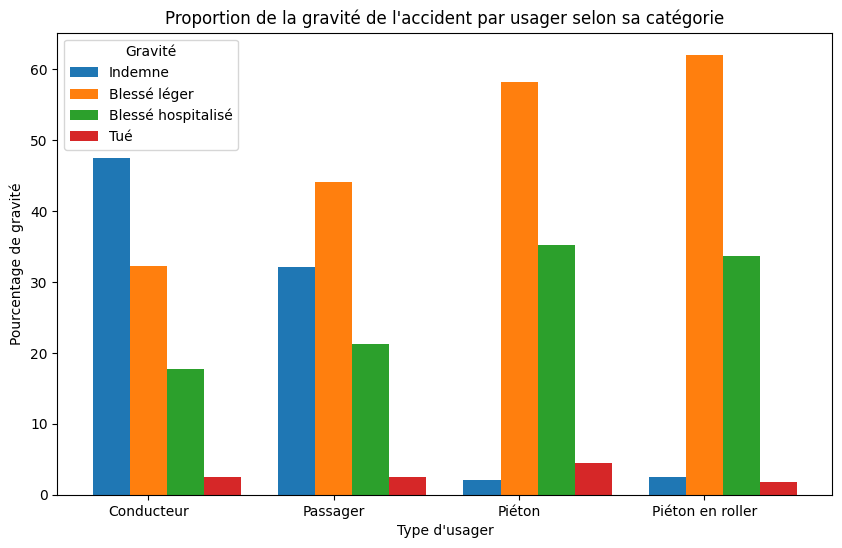

In [ ]:
# Representation graphique de chaque catégorie de gravité en fonction de la catégorie d'usagers.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculer le total de 'grav' par 'catu'
total_grav_par_catu = df.groupby('catu')['grav'].count()

# Calculer le nombre de 'grav' par 'catu'
grav_par_catu = df.groupby(['catu', 'grav']).size().unstack(fill_value=0)

# Calculer les pourcentages de 'grav' par 'catu'
pourcentage_grav_par_catu = grav_par_catu.div(total_grav_par_catu, axis=0) * 100

# Renommer les labels des usagers
pourcentage_grav_par_catu.index = ['Conducteur', 'Passager', 'Piéton', 'Piéton en roller']

# Changer l'ordre d'affichage de la gravité
pourcentage_grav_par_catu = pourcentage_grav_par_catu[[1, 4, 3, 2]]

# Plot
bar_width = 0.2
index = np.arange(len(pourcentage_grav_par_catu.index))

fig, ax = plt.subplots(figsize=(10, 6))
for i, grav_type in enumerate(pourcentage_grav_par_catu.columns):
    ax.bar(index + i * bar_width, pourcentage_grav_par_catu[grav_type], bar_width, label=grav_type)

ax.set_xlabel('Type d\'usager')
ax.set_ylabel('Pourcentage de gravité')
ax.set_title("Proportion de la gravité de l'accident par usager selon sa catégorie")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(pourcentage_grav_par_catu.index)
ax.legend(title='Gravité', labels=['Indemne', 'Blessé léger', 'Blessé hospitalisé', 'Tué'])
plt.show()

In [ ]:
import numpy as np
from scipy.stats import norm

# Calculer les proportions de chaque catégorie de gravité pour chaque catégorie de catu
proportions = df.groupby('catu')['grav'].value_counts(normalize=True).unstack()

# Afficher les proportions
print("Proportions de chaque catégorie de gravité pour chaque catégorie de catu :")
print(proportions)

# Comparer les proportions avec un test de z
catu_reference = 1  # Catégorie de référence (conducteurs)
catu_labels = {1: 'Conducteur', 2: 'Passager', 3: 'Piéton', 4: 'Piéton en roller'}
grav_labels = {1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'}


# Conducteur vs Passager pour toutes les catégories de gravité
for grav in proportions.columns:
    if grav != -1:  # Exclure la catégorie "inconnue" si elle existe
        p_conducteur = proportions.loc[1, grav]
        p_passager = proportions.loc[2, grav] if 2 in proportions.index else 0
        n_conducteur = df[(df['catu'] == 1) & (df['grav'] == grav)].shape[0]
        n_passager = df[(df['catu'] == 2) & (df['grav'] == grav)].shape[0]
        p_diff = p_conducteur - p_passager
        se_diff = np.sqrt(p_conducteur*(1-p_conducteur)/n_conducteur + p_passager*(1-p_passager)/n_passager)
        z_score = p_diff / se_diff
        p_value = 2 * norm.cdf(-np.abs(z_score))  # Test bilatéral
        print(f"Conducteur vs Passager pour grav {grav_labels[grav]} : z-score = {z_score}, p-value = {p_value}")

# Conducteur vs Piéton pour toutes les catégories de gravité
for grav in proportions.columns:
    if grav != -1:  # Exclure la catégorie "inconnue" si elle existe
        p_conducteur = proportions.loc[1, grav]
        p_pieton = proportions.loc[3, grav] if 3 in proportions.index else 0
        n_conducteur = df[(df['catu'] == 1) & (df['grav'] == grav)].shape[0]
        n_pieton = df[(df['catu'] == 3) & (df['grav'] == grav)].shape[0]
        p_diff = p_conducteur - p_pieton
        se_diff = np.sqrt(p_conducteur*(1-p_conducteur)/n_conducteur + p_pieton*(1-p_pieton)/n_pieton)
        z_score = p_diff / se_diff
        p_value = 2 * norm.cdf(-np.abs(z_score))  # Test bilatéral
        print(f"Conducteur vs Piéton pour grav {grav_labels[grav]} : z-score = {z_score}, p-value = {p_value}")

# Passager vs Piéton pour toutes les catégories de gravité
for grav in proportions.columns:
    if grav != -1:  # Exclure la catégorie "inconnue" si elle existe
        p_passager = proportions.loc[2, grav] if 2 in proportions.index else 0
        p_pieton = proportions.loc[3, grav] if 3 in proportions.index else 0
        n_passager = df[(df['catu'] == 2) & (df['grav'] == grav)].shape[0]
        n_pieton = df[(df['catu'] == 3) & (df['grav'] == grav)].shape[0]
        p_diff = p_passager - p_pieton
        se_diff = np.sqrt(p_passager*(1-p_passager)/n_passager + p_pieton*(1-p_pieton)/n_pieton)
        z_score = p_diff / se_diff
        p_value = 2 * norm.cdf(-np.abs(z_score))  # Test bilatéral
        print(f"Passager vs Piéton pour grav {grav_labels[grav]} : z-score = {z_score}, p-value = {p_value}")


Proportions de chaque catégorie de gravité pour chaque catégorie de catu :
grav        -1         1         2         3         4
catu                                                  
1     0.000153  0.475127  0.025117  0.176759  0.322844
2     0.000002  0.321506  0.025649  0.212164  0.440678
3          NaN  0.020972  0.044450  0.352801  0.581776
4          NaN  0.025000  0.018539  0.335955  0.620506
Conducteur vs Passager pour grav Indemne : z-score = 115.79670438541325, p-value = 0.0
Conducteur vs Passager pour grav Tué : z-score = -0.3277608512356976, p-value = 0.7430924897841314
Conducteur vs Passager pour grav Blessé hospitalisé : z-score = -24.13189236764317, p-value = 1.1568973841078837e-128
Conducteur vs Passager pour grav Blessé léger : z-score = -93.87746825137182, p-value = 0.0
Conducteur vs Piéton pour grav Indemne : z-score = 207.61321036668278, p-value = 0.0
Conducteur vs Piéton pour grav Tué : z-score = -8.728357907888237, p-value = 2.5839682301526952e-18
Conducteur vs 

##### c- Table de contingence - catu/grav

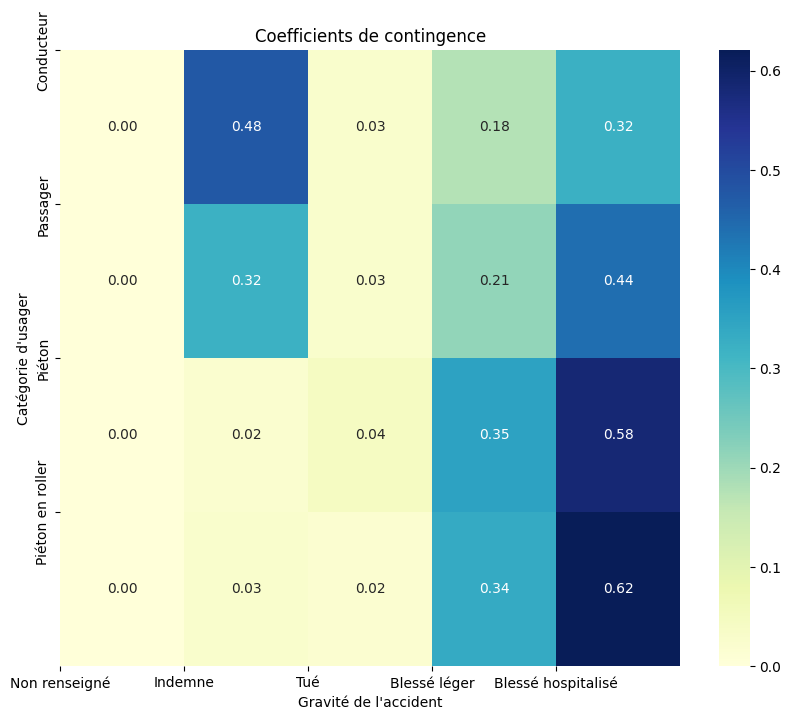

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que catu et grav sont déjà dans votre DataFrame df

# Créer un tableau de contingence
conti = pd.crosstab(df["catu"], df["grav"])

# Ordre d'affichage pour grav
grav_labels = ['Non renseigné','Indemne','Tué', 'Blessé léger', 'Blessé hospitalisé']

# Calcul du coefficient de contingence normalisé
conti_form = conti.apply(lambda x: x / x.sum(), axis=1)

# Tracer le heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conti_form, annot=True, cmap="YlGnBu", fmt=".2f")

# Ajouter des labels pour les axes x et y
plt.xticks(ticks=range(len(conti.columns)), labels=grav_labels)
plt.yticks(ticks=range(len(conti.index)), labels=['Conducteur', 'Passager', 'Piéton', 'Piéton en roller'])

plt.title("Coefficients de contingence")
plt.xlabel("Gravité de l'accident")
plt.ylabel("Catégorie d'usager")
plt.show()


#### 3.2.2 Gravité en fonction du type de route (variable 'catr')

- Nombre d'accidents par gravité et selon le type de route
- Proportion de la gravité de l'accident en fonction du type de route

##### a- Nombre d'accidents par gravité et selon le type de route

In [ ]:
# Nombre de valeurs uniques de catr
nb_valeurs_uniques_catr = df['catr'].nunique()

# Nombre d'occurrences par valeur unique de catr
occurrences_catr = df['catr'].value_counts()

print("Nombre de valeurs uniques de catr :", nb_valeurs_uniques_catr)
print("Nombre d'occurrences par valeur unique de catr :\n", occurrences_catr)


Nombre de valeurs uniques de catr : 8
Nombre d'occurrences par valeur unique de catr :
 catr
4.0    1219254
3.0     874037
1.0     243531
2.0     222505
9.0      39272
7.0      16980
6.0      16875
5.0       4033
Name: count, dtype: int64


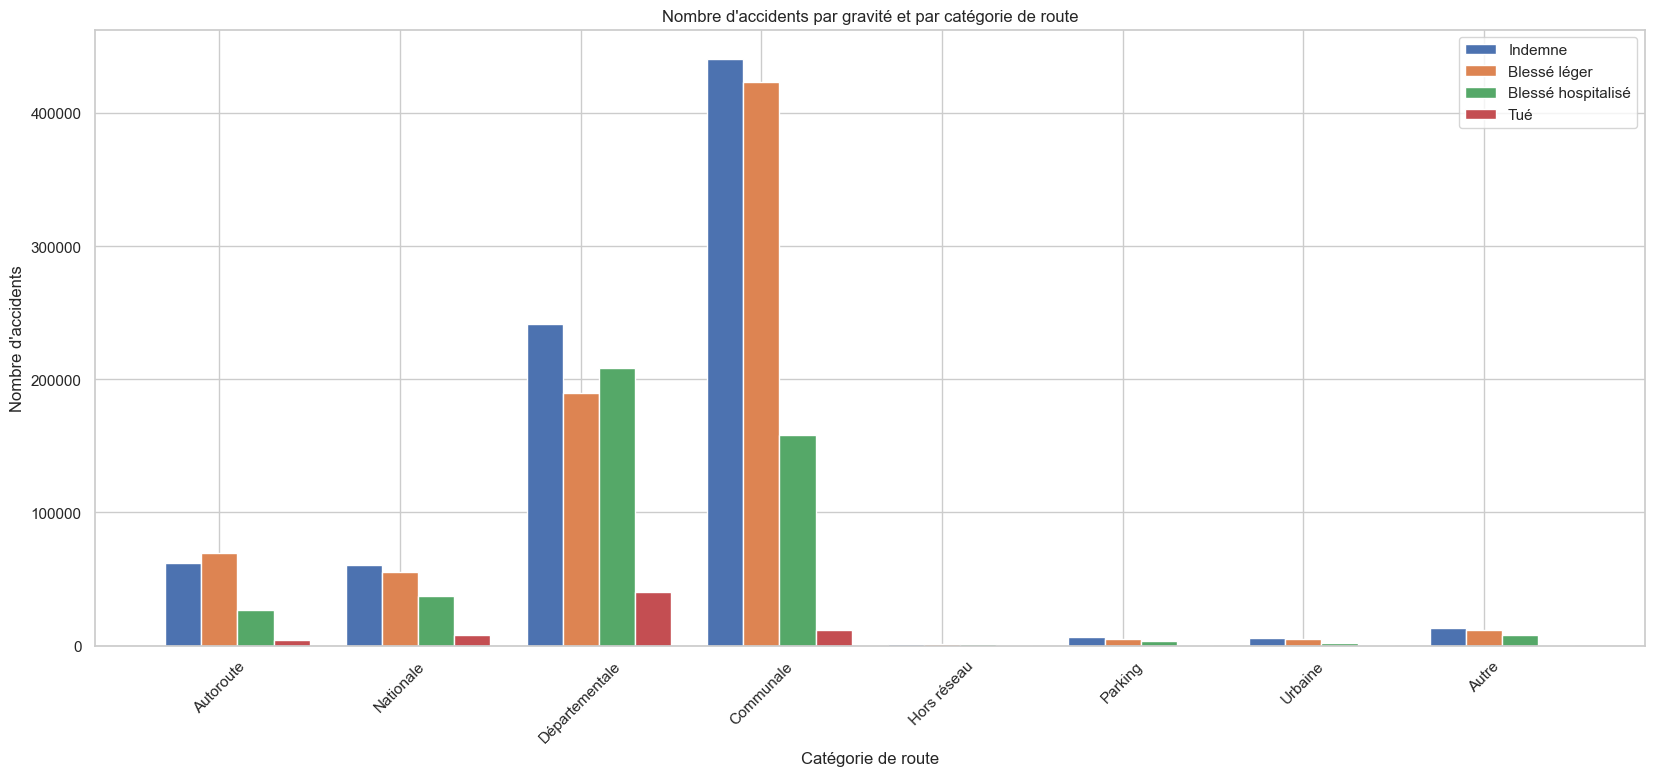

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que votre dataframe s'appelle df

# Compter le nombre d'accidents par gravité et par type de route
accidents_par_grav_catr = df.groupby(['grav', 'catr']).agg({'Num_Acc': 'nunique'}).reset_index()

# Filtrer les données pour chaque gravité
accidents_grav_1 = accidents_par_grav_catr[accidents_par_grav_catr['grav'] == 1]
accidents_grav_2 = accidents_par_grav_catr[accidents_par_grav_catr['grav'] == 2]
accidents_grav_3 = accidents_par_grav_catr[accidents_par_grav_catr['grav'] == 3]
accidents_grav_4 = accidents_par_grav_catr[accidents_par_grav_catr['grav'] == 4]

# Positions des barres
index = list(range(len(accidents_grav_1)))

# Plot
fig, ax = plt.subplots(figsize=(20, 8))

# Largeur des barres
bar_width = 0.2

# Plot des barres pour chaque gravité dans l'ordre demandé
ax.bar([i - bar_width for i in index], accidents_grav_1['Num_Acc'], bar_width, label='Indemne')
ax.bar(index, accidents_grav_4['Num_Acc'], bar_width, label='Blessé léger')
ax.bar([i + bar_width for i in index], accidents_grav_3['Num_Acc'], bar_width, label='Blessé hospitalisé')
ax.bar([i + 2*bar_width for i in index], accidents_grav_2['Num_Acc'], bar_width, label='Tué')

ax.set_xlabel('Catégorie de route')
ax.set_ylabel("Nombre d'accidents")
ax.set_title("Nombre d'accidents par gravité et par catégorie de route")
ax.set_xticks(index)
ax.set_xticklabels(['Autoroute', 'Nationale', 'Départementale', 'Communale', 'Hors réseau', 
                    'Parking', 'Urbaine', 'Autre'],
                   rotation=45)  # Rotation des étiquettes à 45 degrés
ax.legend()

plt.show()


##### b- Proportion de la gravité de l'accident en fonction du type de route

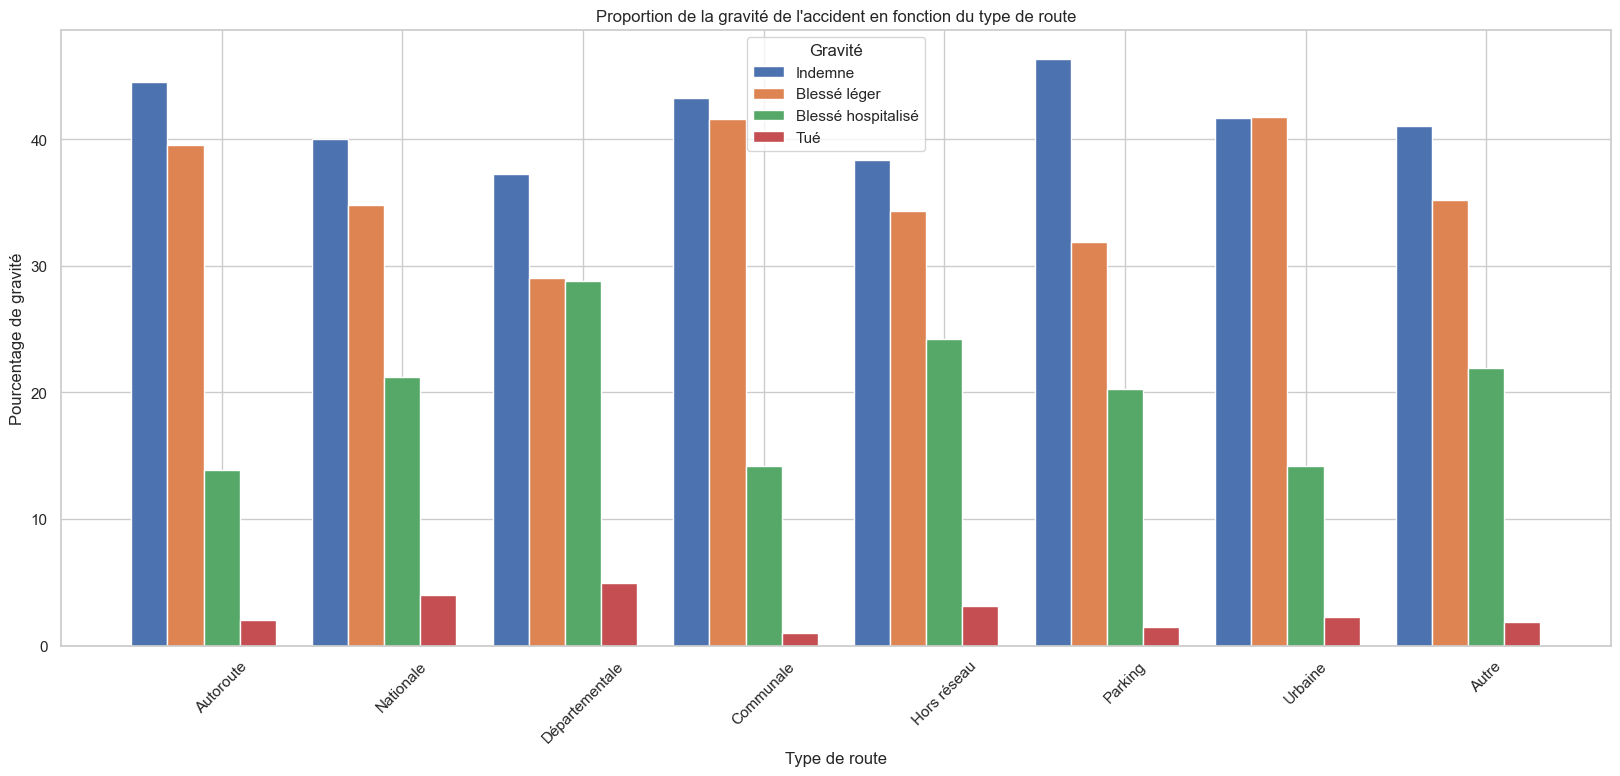

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculer le total de 'grav' par 'catr'
total_grav_par_catr = df.groupby('catr')['grav'].count()

# Calculer le nombre de 'grav' par 'catr'
grav_par_catr = df.groupby(['catr', 'grav']).size().unstack(fill_value=0)

# Calculer les pourcentages de 'grav' par 'catr'
pourcentage_grav_par_catr = grav_par_catr.div(total_grav_par_catr, axis=0) * 100

# Renommer les labels des routes
pourcentage_grav_par_catr.index = ['Autoroute', 'Nationale', 'Départementale', 'Communale', 'Hors réseau', 'Parking', 'Urbaine', 'Autre']

# Changer l'ordre d'affichage de la gravité
pourcentage_grav_par_catr = pourcentage_grav_par_catr[[1, 4, 3, 2]]

# Plot
bar_width = 0.2
index = np.arange(len(pourcentage_grav_par_catr.index))

fig, ax = plt.subplots(figsize=(20, 8))
for i, grav_type in enumerate(pourcentage_grav_par_catr.columns):
    ax.bar(index + i * bar_width, pourcentage_grav_par_catr[grav_type], bar_width, label=grav_type)

ax.set_xlabel('Type de route')
ax.set_ylabel('Pourcentage de gravité')
ax.set_title("Proportion de la gravité de l'accident en fonction du type de route")
ax.set_xticks(index + (len(pourcentage_grav_par_catr.columns) / 2) * bar_width)
ax.set_xticklabels(pourcentage_grav_par_catr.index, rotation=45)
ax.legend(title='Gravité', labels=['Indemne', 'Blessé léger', 'Blessé hospitalisé', 'Tué'])
plt.show()


In [ ]:
import numpy as np
from scipy.stats import norm

# Calculer les proportions de chaque catégorie de gravité pour chaque catégorie de catu
proportions = df.groupby('catr')['grav'].value_counts(normalize=True).unstack()

# Afficher les proportions
print("Proportions de chaque catégorie de gravité pour chaque catégorie de catu :")
print(proportions)

# Comparer les proportions avec un test de z
catur_reference = 1  # Catégorie de référence (conducteurs)
catr_labels = {1: 'Autoroute', 2: 'Nationale', 3: 'Départementale', 4: 'Communale', 5: 'Hors réseau public', 6: 'Parking', 7: 'Urbaine', 9: 'Autre'}
grav_labels = {1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'}


# Comparer les proportions de gravité "Tué" entre chaque type de route avec un test de z
for catr1 in proportions.index:
    for catr2 in proportions.index:
        if catr1 != catr2 and 2 in proportions.columns:  # Comparer chaque paire de catégories de route sauf elles-mêmes et si la catégorie "Tué" est présente
            p_tue_catr1 = proportions.loc[catr1, 2]
            n_tue_catr1 = df[(df['catr'] == catr1) & (df['grav'] == 2)].shape[0]
            p_tue_catr2 = proportions.loc[catr2, 2]
            n_tue_catr2 = df[(df['catr'] == catr2) & (df['grav'] == 2)].shape[0]
            p_diff = p_tue_catr1 - p_tue_catr2
            p_pool = (p_tue_catr1 * n_tue_catr1 + p_tue_catr2 * n_tue_catr2) / (n_tue_catr1 + n_tue_catr2)
            se_diff = np.sqrt(p_pool * (1 - p_pool) * (1 / n_tue_catr1 + 1 / n_tue_catr2))
            z_score = p_diff / se_diff
            p_value = 2 * norm.cdf(-np.abs(z_score))  # Test bilatéral
            print(f"Comparaison des proportions de 'Tué' entre le type de route '{catr_labels[catr1]}' et '{catr_labels[catr2]}' : z-score = {z_score}, p-value = {p_value}")


Proportions de chaque catégorie de gravité pour chaque catégorie de catu :
grav        -1         1         2         3         4
catr                                                  
1.0   0.000066  0.445336  0.020375  0.138849  0.395375
2.0   0.000063  0.399735  0.039734  0.212323  0.348145
3.0   0.000116  0.372798  0.049170  0.287754  0.290163
4.0   0.000118  0.432231  0.010154  0.141763  0.415735
5.0        NaN  0.383337  0.030994  0.242251  0.343417
6.0   0.000237  0.463407  0.014874  0.202726  0.318756
7.0   0.001119  0.417079  0.022203  0.142167  0.417432
9.0   0.000076  0.410471  0.018257  0.219317  0.351879
Comparaison des proportions de 'Tué' entre le type de route 'Autoroute' et 'Nationale' : z-score = -6.129645071355262, p-value = 8.807533370473619e-10
Comparaison des proportions de 'Tué' entre le type de route 'Autoroute' et 'Départementale' : z-score = -9.1497103414459, p-value = 5.708640758033644e-20
Comparaison des proportions de 'Tué' entre le type de route 'Autoroute

In [ ]:
# Comparer les proportions de chaque catégorie de gravité entre chaque paire de catégories de route avec un test de z
for catr1 in proportions.index:
    for catr2 in proportions.index:
        if catr1 != catr2:  # Comparer chaque paire de catégories de route sauf elles-mêmes
            for grav in proportions.columns:
                if grav != -1:  # Exclure la catégorie "inconnue" si elle existe
                    p_grav_catr1 = proportions.loc[catr1, grav]
                    n_grav_catr1 = df[(df['catr'] == catr1) & (df['grav'] == grav)].shape[0]
                    p_grav_catr2 = proportions.loc[catr2, grav]
                    n_grav_catr2 = df[(df['catr'] == catr2) & (df['grav'] == grav)].shape[0]
                    p_diff = p_grav_catr1 - p_grav_catr2
                    p_pool = (p_grav_catr1 * n_grav_catr1 + p_grav_catr2 * n_grav_catr2) / (n_grav_catr1 + n_grav_catr2)
                    se_diff = np.sqrt(p_pool * (1 - p_pool) * (1 / n_grav_catr1 + 1 / n_grav_catr2))
                    z_score = p_diff / se_diff
                    p_value = 2 * norm.cdf(-np.abs(z_score))  # Test bilatéral
                    if p_value < 0.05:
                        print(f"Comparaison des proportions de '{grav_labels[grav]}' entre le type de route '{catr_labels[catr1]}' et '{catr_labels[catr2]}' : z-score = {z_score}, p-value = {p_value}")


Comparaison des proportions de 'Indemne' entre le type de route 'Autoroute' et 'Nationale' : z-score = 20.392876290408484, p-value = 1.93432717352346e-92
Comparaison des proportions de 'Tué' entre le type de route 'Autoroute' et 'Nationale' : z-score = -6.129645071355262, p-value = 8.807533370473619e-10
Comparaison des proportions de 'Blessé hospitalisé' entre le type de route 'Autoroute' et 'Nationale' : z-score = -26.751616956000433, p-value = 1.182435108880758e-157
Comparaison des proportions de 'Blessé léger' entre le type de route 'Autoroute' et 'Nationale' : z-score = 20.220291259518458, p-value = 6.489887107889416e-91
Comparaison des proportions de 'Indemne' entre le type de route 'Autoroute' et 'Départementale' : z-score = 42.404908392458886, p-value = 0.0
Comparaison des proportions de 'Tué' entre le type de route 'Autoroute' et 'Départementale' : z-score = -9.1497103414459, p-value = 5.708640758033644e-20
Comparaison des proportions de 'Blessé hospitalisé' entre le type de ro

##### c- Moyenne annuelle des proportions de gravité d'accidents par type de route

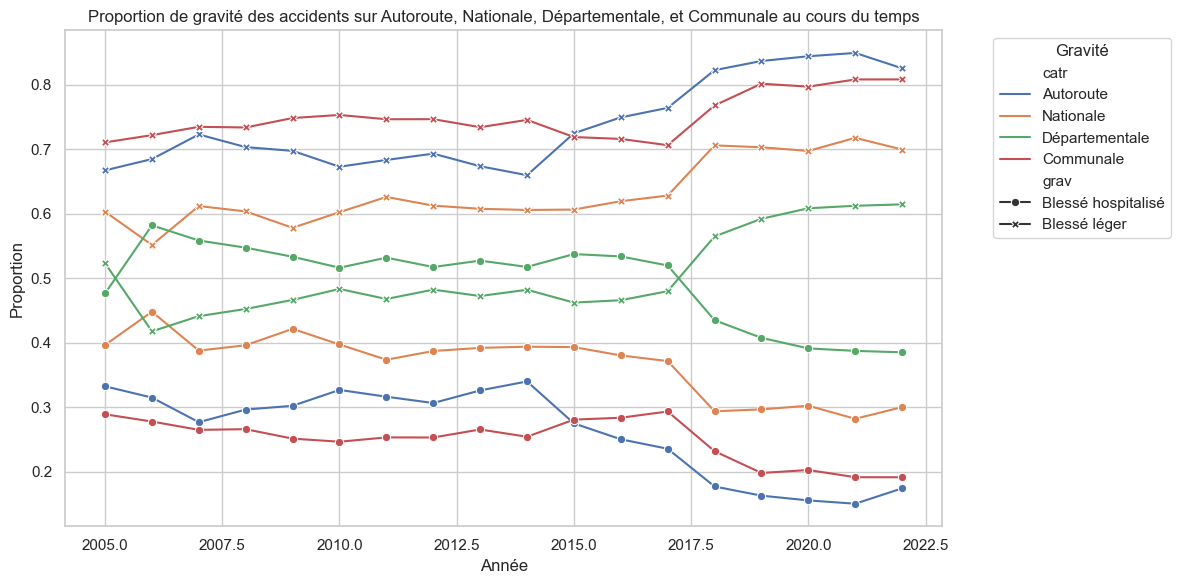

In [ ]:
# Filtrer les accidents de classe 2, 3 et 4 de 'catr' et uniquement les valeurs 3 et 4 de gravité
accidents_classe_1_2_3_4_ = df[(df['catr'].isin([1, 2, 3, 4])) & (df['grav'].isin([3, 4]))]

# Calculer la proportion de chaque catégorie de gravité pour chaque année et chaque catégorie de 'catr'
proportion_gravite_par_an_catrr = accidents_classe_1_2_3_4_.groupby(['an', 'catr', 'grav']).size().reset_index(name='nombre_accidents')

# Calculer le nombre total d'accidents par an pour chaque catégorie de 'catr' (2, 3 et 4)
nombre_total_accidents_par_an_catrr = accidents_classe_1_2_3_4_.groupby(['an', 'catr']).size().reset_index(name='nombre_total_accidents')

# Fusionner les deux DataFrames sur les colonnes 'an' et 'catr'
proportion_gravite_par_an_catrr = proportion_gravite_par_an_catrr.merge(nombre_total_accidents_par_an_catrr, on=['an', 'catr'])

# Calculer la proportion de chaque catégorie de gravité pour chaque année et chaque catégorie de 'catr'
proportion_gravite_par_an_catrr['proportion'] = proportion_gravite_par_an_catrr['nombre_accidents'] / proportion_gravite_par_an_catrr['nombre_total_accidents']

# Remplacement des labels pour la variable 'grav'
proportion_gravite_par_an_catrr['grav'] = proportion_gravite_par_an_catrr['grav'].replace({
    3: 'Blessé hospitalisé',
    4: 'Blessé léger'
})

# Remplacement des valeurs de 'catr'
proportion_gravite_par_an_catrr['catr'] = proportion_gravite_par_an_catrr['catr'].replace({
    1: 'Autoroute',
    2: 'Nationale',
    3: 'Départementale',
    4: 'Communale'
})

# Représentation graphique des proportions de gravité au fil du temps pour chaque catégorie de 'catr'
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=proportion_gravite_par_an_catrr, x='an', y='proportion', hue='catr', style='grav', markers=True, dashes=False)
plt.title("Proportion de gravité des accidents sur Autoroute, Nationale, Départementale, et Communale au cours du temps")
plt.xlabel("Année")
plt.ylabel("Proportion")
plt.legend(title='Gravité', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Utiliser le DataFrame proportion_gravite_par_an_catr
# Convertir 'grav' en une variable catégorielle pour conserver l'ordre des catégories
proportion_gravite_par_an_catr['grav'] = proportion_gravite_par_an_catr['grav'].astype('category')

# Mapper les étiquettes de gravité aux valeurs numériques
label_gravite = {1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'}
proportion_gravite_par_an_catr['grav_label'] = proportion_gravite_par_an_catr['grav'].map(label_gravite)

# Créer un graphique interactif avec Plotly Express
fig = px.line(proportion_gravite_par_an_catr, x='an', y='proportion', color='grav_label', line_group='catr',
              markers=True, title="Proportion de gravité des accidents pour les classes 2, 3 et 4 de 'catr' au fil du temps",
              labels={'an': 'Année', 'proportion': 'Proportion', 'catr': 'Catégorie de catr', 'grav_label': 'Gravité'},
              category_orders={'grav_label': ['Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger']},
              line_dash_sequence=['solid', 'dot', 'dash'],
              )
fig.update_layout(title_x=0.5)
fig.show()


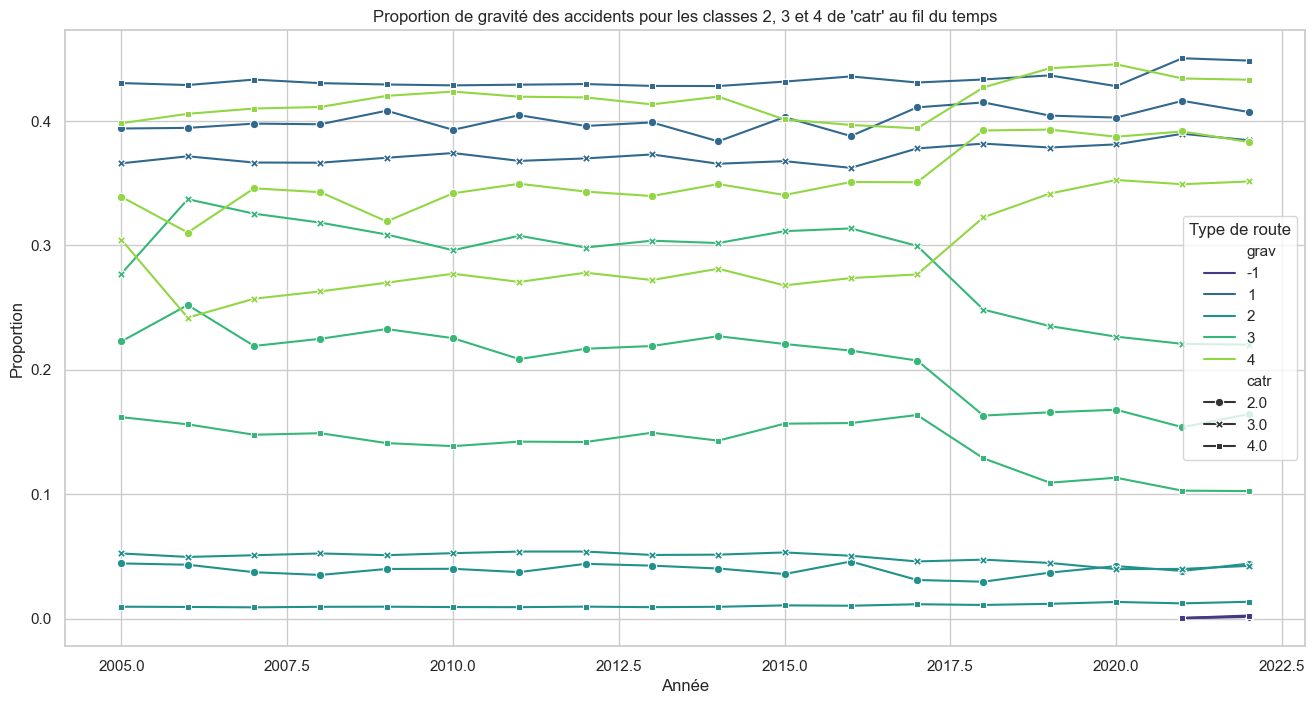

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapper les couleurs aux catégories de gravité
couleurs_gravite = {1: 'green', 2: 'red', 3: 'orange', 4: 'gold'}

# Mapper les étiquettes de type de route aux valeurs numériques
label_catr = {2: 'Nationale', 3: 'Départementale', 4: 'Communale'}
proportion_gravite_par_an_catr['catr_label'] = proportion_gravite_par_an_catr['catr'].map(label_catr)

# Créer un graphique avec Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(data=proportion_gravite_par_an_catr, x='an', y='proportion', hue='grav', style='catr', markers=True, dashes=False, palette='viridis')
plt.title("Proportion de gravité des accidents pour les classes 2, 3 et 4 de 'catr' au fil du temps")
plt.xlabel("Année")
plt.ylabel("Proportion")
plt.legend(title='Gravité', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger'])
plt.gca().set_prop_cycle(None)  # Réinitialiser le cycle des couleurs pour afficher les catr avec différentes couleurs

plt.legend(title='Type de route')
plt.show()


##### d- Table de contingence catr/grav

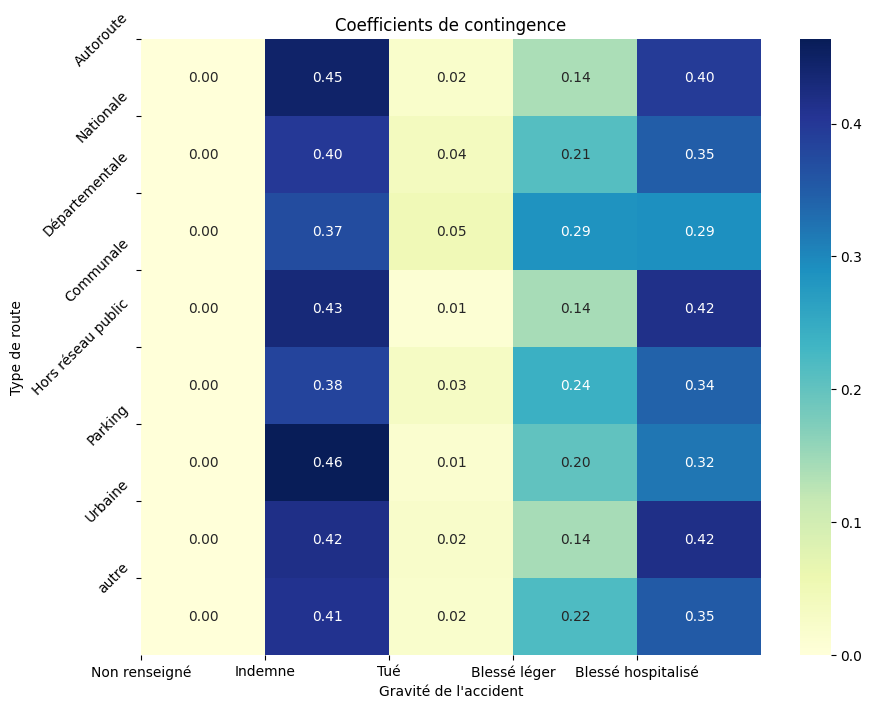

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un tableau de contingence
conti = pd.crosstab(df["catr"], df["grav"])

# Ordre d'affichage pour grav
grav_labels = ['Non renseigné', 'Indemne', 'Tué', 'Blessé léger', 'Blessé hospitalisé']

# Calcul du coefficient de contingence normalisé
conti_form = conti.apply(lambda x: x / x.sum(), axis=1)

# Tracer le heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conti_form, annot=True, cmap="YlGnBu", fmt=".2f")

# Ajouter des labels pour les axes x et y
plt.xticks(ticks=range(len(conti.columns)), labels=grav_labels)
plt.yticks(ticks=range(len(conti.index)), labels=['Autoroute', 'Nationale', 'Départementale', 'Communale', 'Hors réseau public', 'Parking', 'Urbaine', 'autre'])

# Rotation des étiquettes de l'axe y à 45 degrés
plt.yticks(rotation=45)

plt.title("Coefficients de contingence")
plt.xlabel("Gravité de l'accident")
plt.ylabel("Type de route")
plt.show()


#### 3.2.3 Gravité selon agg (Agglomération ou Hors Agglo)

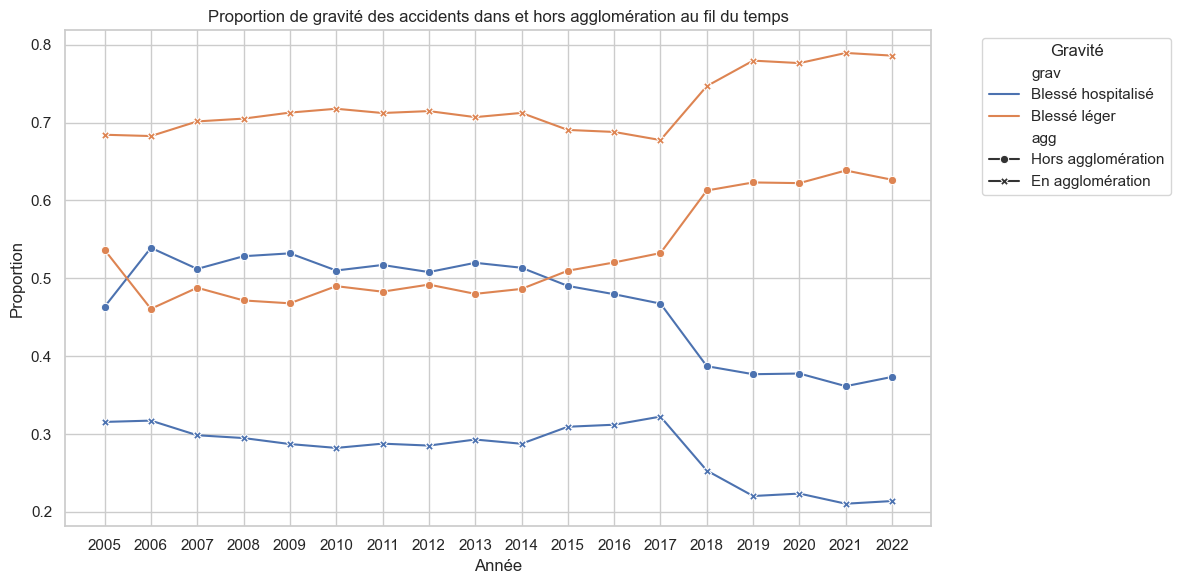

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les accidents de classe 1 et 2 et uniquement les valeurs 3 et 4 de gravité
accidents_classe_1_2_3_4_ = df[(df['agg'].isin([1, 2])) & (df['grav'].isin([3, 4]))]

# Calculer la proportion de chaque catégorie de gravité pour chaque année et chaque catégorie de 'agg'
proportion_gravite_par_an_agg = accidents_classe_1_2_3_4_.groupby(['an', 'agg', 'grav']).size().reset_index(name='nombre_accidents')

# Calculer le nombre total d'accidents par an pour chaque catégorie de 'agg' (1 et 2)
nombre_total_accidents_par_an_agg = accidents_classe_1_2_3_4_.groupby(['an', 'agg']).size().reset_index(name='nombre_total_accidents')

# Fusionner les deux DataFrames sur les colonnes 'an' et 'agg'
proportion_gravite_par_an_agg = proportion_gravite_par_an_agg.merge(nombre_total_accidents_par_an_agg, on=['an', 'agg'])

# Calculer la proportion de chaque catégorie de gravité pour chaque année et chaque catégorie de 'agg'
proportion_gravite_par_an_agg['proportion'] = proportion_gravite_par_an_agg['nombre_accidents'] / proportion_gravite_par_an_agg['nombre_total_accidents']

# Remplacement des labels pour la variable 'grav'
proportion_gravite_par_an_agg['grav'] = proportion_gravite_par_an_agg['grav'].replace({
    3: 'Blessé hospitalisé',
    4: 'Blessé léger'
})

# Remplacement des valeurs de 'agg'
proportion_gravite_par_an_agg['agg'] = proportion_gravite_par_an_agg['agg'].replace({
    1: 'Hors agglomération',
    2: 'En agglomération'
})

# Représentation graphique des proportions de gravité au fil du temps pour chaque catégorie de 'agg'
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=proportion_gravite_par_an_agg, x='an', y='proportion', hue='grav', style='agg', markers=True, dashes=False)
plt.title("Proportion de gravité des accidents dans et hors agglomération au fil du temps")
plt.xlabel("Année")
plt.ylabel("Proportion")
plt.legend(title='Gravité', bbox_to_anchor=(1.05, 1), loc='upper left')

# Spécifier le format des valeurs sur l'axe x pour qu'elles soient entières
plt.xticks(proportion_gravite_par_an_agg['an'].unique(), [str(an) for an in proportion_gravite_par_an_agg['an'].unique()])

plt.tight_layout()
plt.show()

In [ ]:
print(df['an'].unique())

[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020 2021 2022]


#### 3.2.4 Gravité en fonction du sexe

In [ ]:
# Nombre de valeurs uniques de sexe
nb_valeurs_uniques_sexe = df['sexe'].nunique()

# Nombre d'occurrences par valeur unique de sexe
occurrences_sexe = df['sexe'].value_counts()

print("Nombre de valeurs uniques de sexe :", nb_valeurs_uniques_sexe)
print("Nombre d'occurrences par valeur unique de sexe :\n", occurrences_sexe)


Nombre de valeurs uniques de sexe : 3
Nombre d'occurrences par valeur unique de sexe :
 sexe
 1    1773274
 2     857409
-1       5806
Name: count, dtype: int64


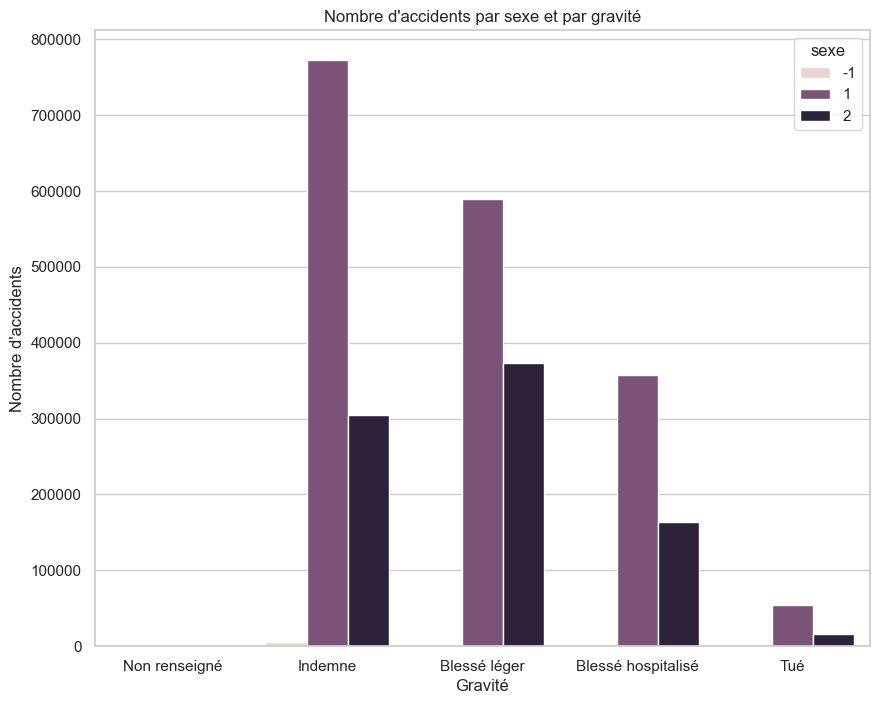

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir l'ordre personnalisé pour l'axe x
order = [-1, 1, 4, 3, 2]

# Définir les étiquettes correspondant à chaque valeur de gravité
labels = ['Non renseigné', 'Indemne', 'Blessé léger', 'Blessé hospitalisé', 'Tué']

# Plot avec Seaborn en spécifiant l'ordre des valeurs sur l'axe x et les étiquettes
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='grav', hue='sexe', order=order)
plt.xticks(ticks=range(len(order)), labels=labels)  # Définir les étiquettes d'axe manuellement

# Ajouter des titres et des étiquettes d'axes
plt.title("Nombre d'accidents par sexe et par gravité")
plt.xlabel("Gravité")
plt.ylabel("Nombre d'accidents")

# Afficher le graphique
plt.show()


   grav  proportion_femmes  proportion_hommes
0     1           0.354762           0.435985
1     2           0.019271           0.030512
2     3           0.190730           0.201493
3     4           0.435237           0.332010


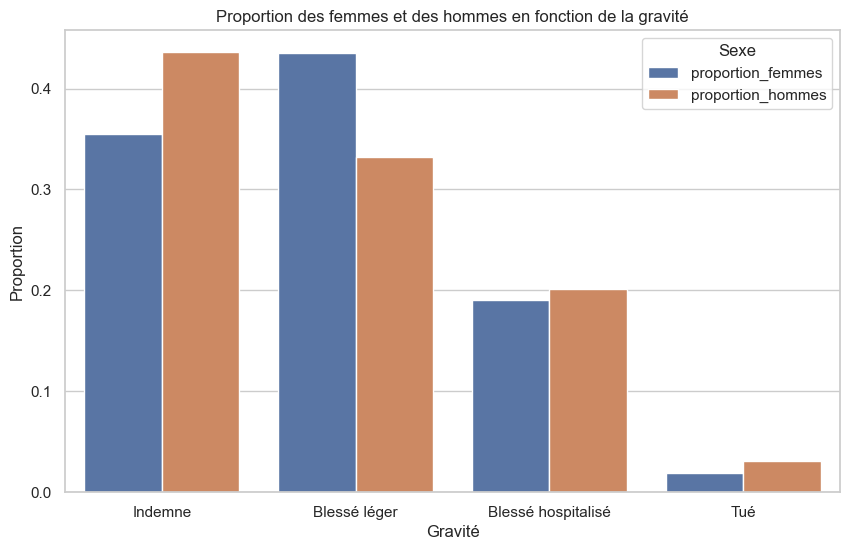

In [ ]:
import pandas as pd

# Calculer le nombre total d'accidents par sexe
total_accidents_by_sex = df.groupby('sexe').size().reset_index(name='total_accidents_sexe')

# Calculer le nombre total d'accidents par gravité et sexe
total_accidents = df.groupby(['grav', 'sexe']).size().reset_index(name='total_accidents')

# Fusionner les données pour les hommes et les femmes sur la gravité
merged_data = pd.merge(total_accidents, total_accidents_by_sex, on='sexe')

# Calculer la proportion de chaque sexe pour chaque classe de gravité
merged_data['proportion'] = merged_data['total_accidents'] / merged_data['total_accidents_sexe']

# Filtrer les données pour les femmes
females_data = merged_data[merged_data['sexe'] == 2]

# Filtrer les données pour les hommes
males_data = merged_data[merged_data['sexe'] == 1]

# Créer un DataFrame pour les femmes avec les proportions
df_sexe_femmes = females_data[['grav', 'proportion']].rename(columns={'proportion': 'proportion_femmes'})

# Créer un DataFrame pour les hommes avec les proportions
df_sexe_hommes = males_data[['grav', 'proportion']].rename(columns={'proportion': 'proportion_hommes'})

# Fusionner les DataFrames
df_sexe = pd.merge(df_sexe_femmes, df_sexe_hommes, on='grav')

# Afficher le DataFrame résultant
print(df_sexe)

import seaborn as sns
import matplotlib.pyplot as plt

# Définir l'ordre d'apparition des classes de gravité
order = [1, 4, 3, 2]

# Créer un DataFrame pour seaborn
df_seaborn = pd.melt(df_sexe, id_vars=['grav'], var_name='sexe', value_name='proportion')

# Créer le graphique avec seaborn en spécifiant l'ordre des classes de gravité
plt.figure(figsize=(10, 6))
sns.barplot(data=df_seaborn, x='grav', y='proportion', hue='sexe', order=order)

# Ajouter un titre et des étiquettes aux axes
plt.xlabel('Gravité')
plt.ylabel('Proportion')
plt.title('Proportion des femmes et des hommes en fonction de la gravité')

# Renommer les labels de l'axe x
plt.xticks(ticks=range(4), labels=['Indemne', 'Blessé léger', 'Blessé hospitalisé', 'Tué'])

# Afficher la légende
plt.legend(title='Sexe')

# Afficher le graphique
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

# Initialiser une liste pour stocker les résultats
results = []

# Boucler sur chaque classe de gravité
for gravite in df['grav'].unique():
    # Filtrer les données pour la classe de gravité actuelle
    df_gravite = df[df['grav'] == gravite]
    
    # Nombre total d'accidents pour cette classe de gravité
    total_accidents = df_gravite['Num_Acc'].sum()
    
    # Nombre d'accidents impliquant des hommes pour cette classe de gravité
    accidents_hommes = df_gravite[df_gravite['sexe'] == 1]['Num_Acc'].count()
    
    # Nombre d'accidents impliquant des femmes pour cette classe de gravité
    accidents_femmes = df_gravite[df_gravite['sexe'] == 2]['Num_Acc'].count()
    
    # Effectuer un test de proportions (test du z) entre hommes et femmes
    count = [accidents_hommes, accidents_femmes]
    nobs = [total_accidents, total_accidents]
    z_score, p_value = proportions_ztest(count, nobs, alternative='two-sided')
    
    # Ajouter les résultats à la liste
    results.append({
        'Classe de gravité': gravite,
        'Accidents hommes': accidents_hommes,
        'Accidents femmes': accidents_femmes,
        'P-value': p_value
    })

# Créer un DataFrame à partir des résultats
results_df = pd.DataFrame(results)

# Afficher les résultats
print(results_df)


   Classe de gravité  Accidents hommes  Accidents femmes   P-value
0                  4            588744            373176  0.000000
1                  3            357302            163534  0.000000
2                  1            773121            304176  0.000000
3                  2             54106             16523  0.000000
4                 -1                 1                 0  0.317311


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['grav']"

#### 3.2.5 Variables obs, obsm, nbv, vosp

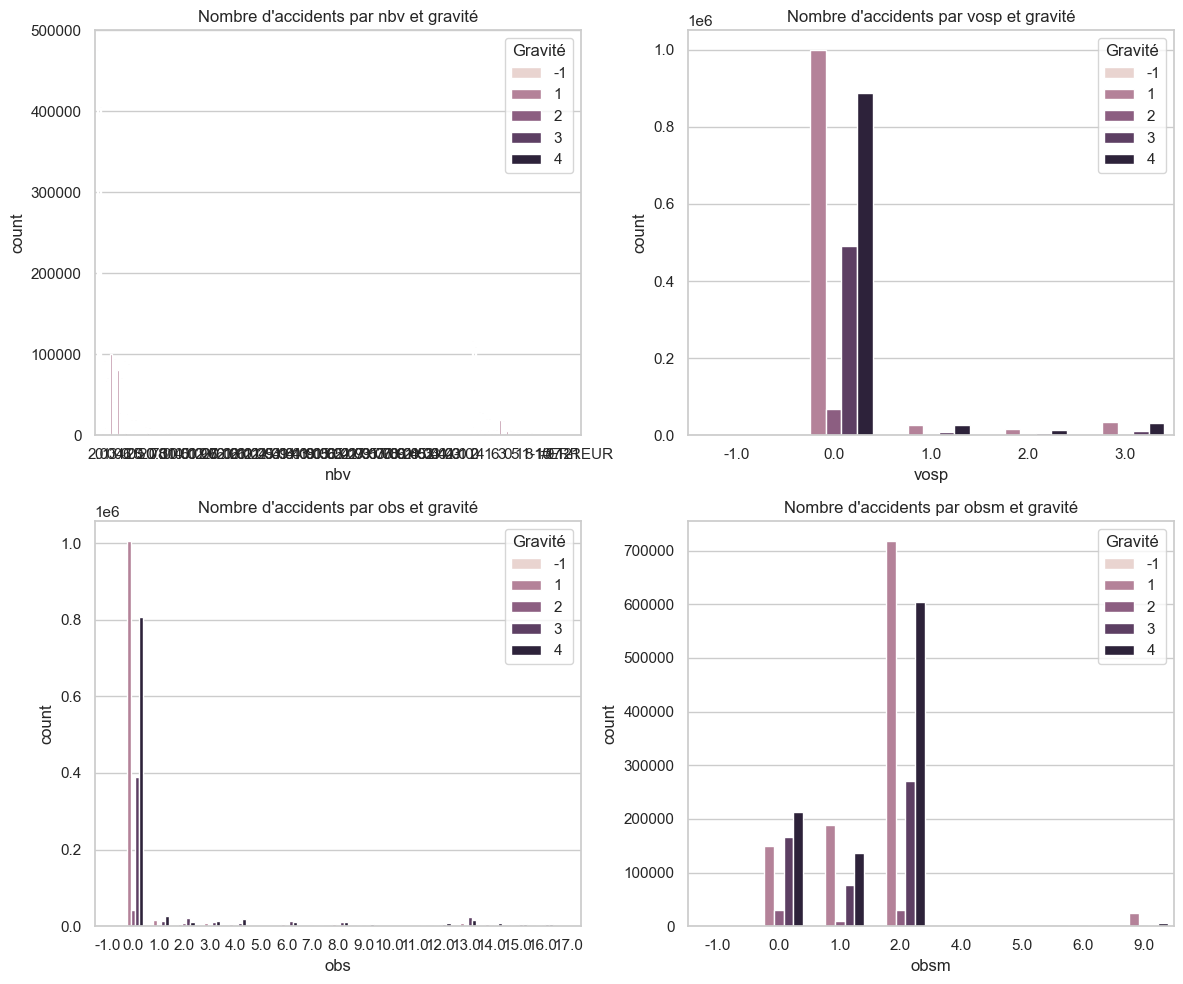

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les noms des variables encodées
encoded_vars = ['nbv', 'vosp', 'obs', 'obsm']

# Créer une figure avec une disposition de sous-graphiques 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Parcourir les variables encodées et créer un graphique pour chacune
for i, var in enumerate(encoded_vars):
    # Sélectionner l'axe correspondant
    ax = axes[i // 2, i % 2]
    
    # Tracer le graphique avec Seaborn
    sns.countplot(data=df, x=var, hue='grav', ax=ax)
    
    # Ajouter un titre au graphique
    ax.set_title(f'Nombre d\'accidents par {var} et gravité')
    
    # Ajouter une légende au graphique
    ax.legend(title='Gravité')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


### 3.3 Outlier


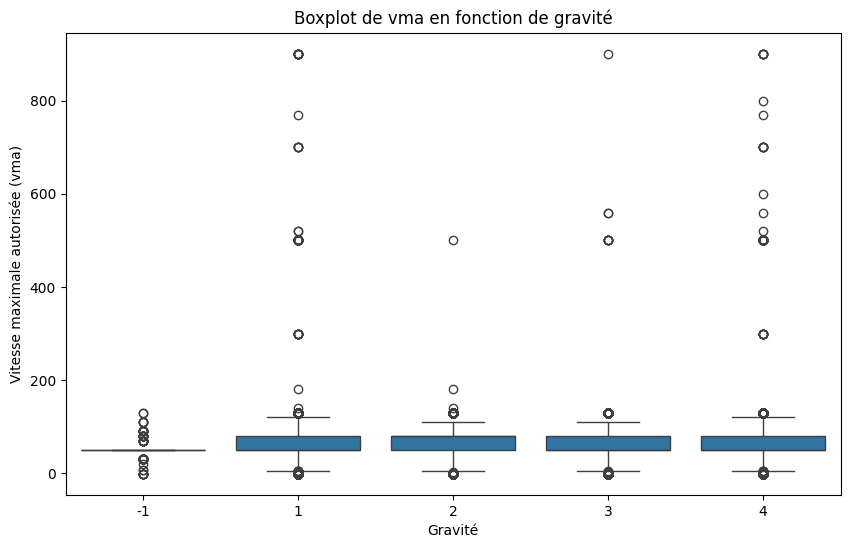

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer le boxplot avec Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='grav', y='vma', data=df)
plt.title('Boxplot de vma en fonction de gravité')
plt.xlabel('Gravité')
plt.ylabel('Vitesse maximale autorisée (vma)')
plt.show()


Largeur de la chaussée affectée à la circulation des véhicules ne sont pas compris les bandes d'arrêt
d'urgence, les TPC et les places de stationnement (en m).

In [ ]:
locp_counts = df['larrout'].value_counts()
total_count = len(df['larrout'])
print("Valeurs uniques et leur décompte pour la variable 'larrout':")
for value, count in locp_counts.items():
    percentage = (count / total_count) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")
    
na_count = df['larrout'].isna().sum()
percentage_missing = (na_count / total_count) * 100
print("Nombre de valeurs manquantes pour la variable 'larrout':", na_count)
print("Pourcentage de données manquantes pour la variable 'int': {:.2f}%".format(percentage_missing))


Valeurs uniques et leur décompte pour la variable 'larrout':
 -1: 339208 (68.64%)
4: 6537 (1.32%)
5: 2960 (0.60%)
7: 2523 (0.51%)
3: 2126 (0.43%)
5,5: 1523 (0.31%)
14: 692 (0.14%)
10,5: 671 (0.14%)
10: 619 (0.13%)
6: 595 (0.12%)
0: 562 (0.11%)
13,5: 523 (0.11%)
3,5: 459 (0.09%)
12: 361 (0.07%)
9: 293 (0.06%)
17,5: 187 (0.04%)
7.0: 82 (0.02%)
8: 75 (0.02%)
6,5: 69 (0.01%)
15: 57 (0.01%)
18: 56 (0.01%)
4,5: 50 (0.01%)
5,6: 45 (0.01%)
7,3: 45 (0.01%)
5,8: 42 (0.01%)
5,4: 41 (0.01%)
7,5: 40 (0.01%)
14.0: 36 (0.01%)
7,6: 35 (0.01%)
6,3: 34 (0.01%)
6,2: 33 (0.01%)
70.0: 27 (0.01%)
65.0: 26 (0.01%)
50.0: 25 (0.01%)
24: 25 (0.01%)
6,4: 25 (0.01%)
5,2: 24 (0.00%)
6,8: 24 (0.00%)
5,7: 24 (0.00%)
13: 24 (0.00%)
5,3: 24 (0.00%)
17: 23 (0.00%)
21: 22 (0.00%)
140.0: 21 (0.00%)
6,6: 21 (0.00%)
60.0: 21 (0.00%)
10,3: 20 (0.00%)
6,7: 19 (0.00%)
6.0: 19 (0.00%)
170.0: 18 (0.00%)
5.2: 18 (0.00%)
5.6: 18 (0.00%)
11: 18 (0.00%)
5.7: 17 (0.00%)
4,8: 16 (0.00%)
5.4: 16 (0.00%)
11,5: 16 (0.00%)
8,5: 16 (0.00%

Imputation des Nan et des -1 par mode ou KNN.